In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [347]:
data2016_m = pd.read_csv('election data/2016/2016_parliamentary_round_1_majoritarian.csv')
data2016_p=pd.read_csv('election data/2016/2016_parliamentary_round_1_proportional.csv')
data2018=pd.read_csv('election data/2018/2018_presidential_round_1_proportional.csv')
data2020_m=pd.read_csv('election data/2020/2020_parliamentary_round_1_majoritarian.csv')
data2020_p=pd.read_csv('election data/2020/2020_parliamentary_round_1_proportional.csv')
data2021=pd.read_csv('election data/2021.csv')

ანომალიების პოვნისას ჩვენი მთავარი მიზანია პირველ რიგში დავამუშავოთ მონაცემები და დავაგდინოთ თუ რაში უნდა ვეძებოთ ანომალია, მაგალითად კოორდინატებში ვერ მოვძებნით ვერ ვიტყვით რომ თუ რომელირავ კონკრეტული კოორდინატები სხვებისგან განცალკევებიტაა ანომალიაა, ეს უბრალოდ ადგილია, მაგრამ შეგვიძლია ეს მონაცემი გამოვიყენოთ თუ აღმოვაჩენთ რაიმეს რასაც ანომალიად მივიჩნევთ გამოსატანად ან იმის შესამოწმებლად რაიმე კლასტერის წევრი ხომ არააა ჩვენ კიდევ ანომალია გვგონია...ანომალიებს ვეძებთ 2021 წლის მონაცემებში თუმცა მანამდე არსებული შეგვიძლია გამოვიყენოთ, ჯერ თვითონ 2021 წელში რომ ვეძებოთ და შემდეგ სხვა წლებთან მიმართებაში თუ არსებობს 2021 წელს რაიმე ანომალია...

შეგვიძლია რაიმე კონკრეტული სვეტების ნაცვლად ავიღოთ რაიმე კომბინაციები, თუნდაც დარეგისტრირებულ და მისულ ადაიამთა შორის სხვაობა, ან პროცენტული მაჩვენებელი ხმების... ანომალიას ვერ ვიტყვით თუ მაგალითად ქალების რაოდენობა უფრო მეტია ვიდრე კაცების საარჩევნო უბანზე, მაგრამ თუ წლების განმავლობაში დაუშვათ ეს სხვაობა ერთ კონკრეტულ ლოკაციაზე მკვეთრად შეიცვალა უკვე საეჭვოა ეს...სხვადასხვა "კომბინაციები" შეგვიძლია ვნახოთ და მაქსიმალურად შევეცადოთ გავაფართოოთ ანომალიების ძებნის არეალი...

In [204]:
data2016_m.shape

(3559, 31)

In [205]:
data2016_m

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
0,41.570394,41.633551,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,თხილნარის მეურნეობა,სკოლის შენობა,ს.თხილნარი,NaN,https://archiveresults.cec.gov.ge/results/2016...,72,...,3,10,3,8.0,4.0,23.0,98.0,182.0,19.0,14
1,41.777929,44.820185,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#80 ბაგა ბაღი,თემქის დას. 3 მკრ. 2 კვარტ.,NaN,https://archiveresults.cec.gov.ge/results/2016...,19,...,3,32,3,33.0,34.0,NaN,258.0,141.0,NaN,73
2,41.646424,41.631763,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#2 საჯარო სკოლა,ხ. ახვლედიანის (ყოფ ი ჯინჭარაძის ქ.) #19,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,3,29,3,16.0,15.0,36.0,300.0,133.0,47.0,191
3,41.999416,43.584695,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ხაშური,ბაგა-ბაღის შენობაN3,ხეთაგურის N10,NaN,https://archiveresults.cec.gov.ge/results/2016...,43,...,3,20,4,17.0,16.0,11.0,110.0,95.0,49.0,350
4,41.671687,44.914273,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#131-ე საჯარო სკოლა,ჭიჭინაძის ქ. 12,NaN,https://archiveresults.cec.gov.ge/results/2016...,13,...,3,31,3,18.0,48.0,17.0,281.0,133.0,54.0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554,41.567908,45.846634,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,მაღაროს,კულტურის სახლის შენობა,"სოფელი მაღარო, 27-ე ქ. #13",NaN,https://archiveresults.cec.gov.ge/results/2016...,25,...,3,14,3,17.0,8.0,6.0,242.0,149.0,20.0,30
3555,41.729269,44.786170,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#166–ე საჯარო სკოლა,აკ.წერეთლის გამზ.#42,NaN,https://archiveresults.cec.gov.ge/results/2016...,15,...,3,19,3,11.0,49.0,39.0,302.0,136.0,36.0,74
3556,42.041819,42.295663,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ. ბურნათი,კლუბი,სოფ. ბურნათი,NaN,https://archiveresults.cec.gov.ge/results/2016...,60,...,3,6,3,17.0,NaN,NaN,95.0,29.0,3.0,31
3557,42.460380,41.720943,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,კოოპერატივის შენობა,სოფ ახალკახათი შ.რუსთაველის #91,NaN,https://archiveresults.cec.gov.ge/results/2016...,66,...,3,27,3,19.0,NaN,NaN,335.0,323.0,8.0,4


In [206]:
for i in data2016_m.columns:
    print(i)
    print( data2016_m[i].unique())
    print('-----------------------------------')

lat
[41.5703945  41.77792872 41.64642449 ... 42.04181925 42.4603801
 42.32795751]
-----------------------------------
lng
[41.6335512  44.82018471 41.63176348 ... 42.29566276 41.7209427
 42.42338238]
-----------------------------------
year
[2016]
-----------------------------------
map_name
['2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის არჩევნები']
-----------------------------------
address_1
['თხილნარის მეურნეობა' nan 'ქ. ბათუმის' ... 'აზავრეთის'
 'პატარიძისმაღ.სამმართ' 'სოფ. ბურნათი']
-----------------------------------
address_2
['სკოლის შენობა' '#80 ბაგა ბაღი' '#2 საჯარო სკოლა' ...
 'საბავშვო ბაღების #11 განყოფილების შენობა' '#166–ე საჯარო სკოლა'
 'N2 საჯ.სკოლა']
-----------------------------------
address_3
['ს.თხილნარი' 'თემქის დას. 3 მკრ. 2 კვარტ.'
 'ხ. ახვლედიანის (ყოფ ი ჯინჭარაძის ქ.) #19' ... 'სოფ. ბურნათი'
 'სოფ ახალკახათი შ.რუსთაველის #91' 'სოლომონ 2 N2']
-----------------------------------
address_4
[nan]
-----------------------------------
protocols
['https://archivere

In [207]:
data2016_p.shape

(3609, 32)

In [208]:
data2016_p

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
0,41.488610,44.798216,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,ყოფილიმე-6 ტრესტის შენობა,"ქ.მარნეული,გოგებაშვილის ქ.N2",NaN,https://archiveresults.cec.gov.ge/results/2016...,36,...,35,3,30,2,7,12,106,278,1,10
1,41.479801,44.807686,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,N5 საჯარო სკოლა,ქ. მარნეული რუსთაველის ქ.N52,NaN,https://archiveresults.cec.gov.ge/results/2016...,36,...,29,3,24,5,6,13,159,267,3,25
2,41.472731,44.815366,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,N8 საჯარო სკოლა,ქ. მარნეული რუსთაველის ქ.N68,NaN,https://archiveresults.cec.gov.ge/results/2016...,36,...,46,3,22,0,1,1,100,372,1,16
3,41.482996,44.801971,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,N2 საჯარო სკოლა,ქ. მარნეული რუსთაველის ქ.N22,NaN,https://archiveresults.cec.gov.ge/results/2016...,36,...,28,3,38,6,7,13,135,183,7,15
4,41.474075,44.812570,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,N3 საჯარო სკოლა,ქ. მარნეული რუსთაველის ქ. N63,NaN,https://archiveresults.cec.gov.ge/results/2016...,36,...,29,3,50,0,3,9,104,361,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,42.261208,42.690419,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#21 სკოლის შენობა,აღმაშენებლის გამზ. 63,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,27,3,24,23,32,23,279,200,29,19
3605,42.254010,42.690328,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,კერძო სახლი,ნინოშვილის 203,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,12,3,26,34,22,20,286,148,36,27
3606,42.255105,42.682414,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,ჩოგბურთის სპორტ.ადმ.შენობა,ხორავას 2/2,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,21,3,22,29,21,25,262,184,35,25
3607,42.252624,42.682340,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#31 სკოლის შენობა,ხორავას 3,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,12,3,22,23,41,17,283,145,23,26


In [209]:
for i in data2016_p.columns:
    print(i)
    print( data2016_p[i].unique())
    print('-----------------------------------')

lat
[41.4886099  41.4798013  41.4727307  ... 42.2551051  42.25262374
 42.2537714 ]
-----------------------------------
lng
[44.7982156  44.807686   44.8153659  ... 42.6824139  42.68234015
 42.6802957 ]
-----------------------------------
year
[2016]
-----------------------------------
map_name
['2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის არჩევნები']
-----------------------------------
address_1
[nan 'შაუმიანი' 'შაუმიანის დაბის' ... 'დ.თონეთი' 'ორბეთი' 'დიდგორი']
-----------------------------------
address_2
['ყოფილიმე-6 ტრესტის შენობა' 'N5 საჯარო სკოლა' 'N8 საჯარო სკოლა' ...
 'ჩოგბურთის სპორტ.ადმ.შენობა' '#31 სკოლის შენობა' '#25 ბაგა-ბაღის შენობა']
-----------------------------------
address_3
['ქ.მარნეული,გოგებაშვილის ქ.N2' 'ქ. მარნეული რუსთაველის ქ.N52'
 'ქ. მარნეული რუსთაველის ქ.N68' ... 'ხორავას 2/2' 'ხორავას 3' 'ხორავას 8']
-----------------------------------
address_4
[nan]
-----------------------------------
protocols
['https://archiveresults.cec.gov.ge/results/20161008/oqm/7

In [210]:
data2018.shape

(3636, 31)

In [211]:
data2018

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
0,41.614424,43.882007,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ბერთას,სკოლის შენობა,სოფ. ბერთა,NaN,https://archiveresults.cec.gov.ge/results/2018...,25,...,3,3,3,4,12,1,0,21,19,5
1,42.165575,42.350676,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქალაქი,მე-11 საჯარო სკოლა,თელიას ქ #4,NaN,https://archiveresults.cec.gov.ge/results/2018...,54,...,3,7,3,20,36,2,6,127,171,17
2,42.390882,41.805339,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ხამისკური,საჯარო სკოლის შენობა,სოფ.ხამისკური,NaN,https://archiveresults.cec.gov.ge/results/2018...,66,...,3,17,2,9,76,36,2,218,213,42
3,42.320007,43.432911,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მოხვის საარჩევნო უბანი,მოხვის საჯარო სკოლის შენობა,სოფ. მოხვა,NaN,https://archiveresults.cec.gov.ge/results/2018...,50,...,3,1,3,0,57,2,0,98,12,5
4,41.725762,44.739036,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,NaN,N83 ბაგა ბაღი,ვაჟა-ფშაველას გამზ. #49,NaN,https://archiveresults.cec.gov.ge/results/2018...,2,...,3,27,3,15,46,61,63,201,181,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3631,41.787349,44.832591,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,NaN,#175 საჯ.სკოლა,მუხიანის 3 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2018...,10,...,3,20,2,33,26,27,19,168,242,42
3632,42.075586,43.611581,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ალის თემის,საჯარო სკოლის შენობა,სოფ.ბრილი,NaN,https://archiveresults.cec.gov.ge/results/2018...,35,...,3,3,2,10,21,0,0,59,64,4
3633,41.745374,42.245502,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ნაღვარევი,სოფლის სახლი,სოფ. ნაღვარევი,NaN,https://archiveresults.cec.gov.ge/results/2018...,82,...,3,0,3,1,11,2,0,81,12,0
3634,41.920110,44.727992,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ნატახტრის,კლუბის შენობა,"სოფ. ნატახტარი, ქ. 1 № 112",NaN,https://archiveresults.cec.gov.ge/results/2018...,27,...,3,11,3,62,51,12,4,272,204,32


In [212]:
for i in data2018.columns:
    print(i)
    print( data2018[i].unique())
    print('-----------------------------------')

lat
[41.61442364 42.1655746  42.39088183 ... 41.7453738  41.92010974
 42.17196578]
-----------------------------------
lng
[43.882007   42.35067578 41.80533886 ... 42.2455024  44.72799182
 44.69254911]
-----------------------------------
year
[2018]
-----------------------------------
map_name
['2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები']
-----------------------------------
address_1
['ბერთას' 'ქალაქი' 'ხამისკური' ... 'გუმათის' 'ნატახტრის' 'ანანური']
-----------------------------------
address_2
['სკოლის შენობა' 'მე-11 საჯარო სკოლა' 'საჯარო სკოლის შენობა' ...
 'სოფ.I ობჩის საჯარო სკოლა' 'მე-4 ბაგა-ბაღი' 'ს. ანანურის საჯარო სკოლა']
-----------------------------------
address_3
['სოფ. ბერთა' 'თელიას ქ #4' 'სოფ.ხამისკური' ... 'სოფ. ნაღვარევი'
 'სოფ. ნატახტარი, ქ. 1 № 112' 'ს. ანანური']
-----------------------------------
address_4
[nan]
-----------------------------------
protocols
['https://archiveresults.cec.gov.ge/results/20181028/oqm/3/oqmi_25_33.html'
 'https://archiveresults.cec

In [213]:
data2020_m.shape

(3744, 30)

In [214]:
data2020_m

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated,participated_confidence,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
0,41.578140,44.985582,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N43 საბავშვო ბაღი,მე-19 მკრ. რ-ნი,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,766,2,23,3,42.0,273,338.0,12.0,15.0,53
1,42.097682,43.228232,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,უბისის,საჯარო სკოლა,სოფ. უბისა,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,214,3,13,3,7.0,121,57.0,3.0,10.0,3
2,41.695960,44.861824,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,157-ე საჯარო სკოლა,ვარკეთილის 4 მიკრო რაიონი 3 კვარტალი,NaN,https://archiveresults.cec.gov.ge/results/2020...,4,...,815,3,41,3,NaN,287,280.0,25.0,NaN,181
3,42.342824,42.994507,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ძველი ტყიბულის მესამე საარჩევნო უბანი,ტყიბულის № 1 საჯარო სკოლის შენობა,"ტყიბული, ვაჟა-ფშაველას ქ №1",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,500,3,12,3,49.0,217,130.0,26.0,10.0,56
4,42.141334,42.988948,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,#37 ს/უბ (არგვეთა),არგვეთის N34 საბავშვო ბაღი,არგვეთა მე-15 ქN1,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,653,3,22,3,61.0,310,189.0,16.0,22.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,41.765373,44.798307,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N143 ბაგა-ბაღი,ხორნაბუჯის ქ.N21,NaN,https://archiveresults.cec.gov.ge/results/2020...,7,...,805,3,45,3,NaN,293,NaN,47.0,68.0,352
3740,NaN,NaN,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,NaN,NaN,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,13,3,0,3,NaN,8,3.0,0.0,1.0,1
3741,41.695515,44.515969,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,დიდგორი,საჯარო სკოლის შენობა,სოფ.დიდგორი,NaN,https://archiveresults.cec.gov.ge/results/2020...,14,...,110,3,6,3,NaN,77,10.0,9.0,7.0,2
3742,41.593856,42.876323,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,აბათხევის რიტუალების შენობა,სოფელი აბათხევი,NaN,https://archiveresults.cec.gov.ge/results/2020...,17,...,309,3,15,3,7.0,215,52.0,0.0,16.0,4


In [215]:
for i in data2020_m.columns:
    print(i)
    print( data2020_m[i].unique())
    print('-----------------------------------')

lat
[41.5781402  42.09768178 41.69595988 ... 41.69551509 41.59385598
 41.81516983]
-----------------------------------
lng
[44.9855824  43.22823162 44.86182402 ... 44.51596925 42.87632346
 41.78048015]
-----------------------------------
year
[2020]
-----------------------------------
map_name
['2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის არჩევნები']
-----------------------------------
address_1
[nan 'უბისის' 'ძველი ტყიბულის მესამე საარჩევნო უბანი' ... 'საგურამოს'
 'დიდგორი' 'გელაურის ს/ უ']
-----------------------------------
address_2
['N43 საბავშვო ბაღი' 'საჯარო სკოლა' '157-ე საჯარო სკოლა' ...
 'N143 ბაგა-ბაღი' 'აბათხევის რიტუალების შენობა'
 'ქობულეთის მე-6 საჯარო სკოლა']
-----------------------------------
address_3
['მე-19 მკრ. რ-ნი' 'სოფ. უბისა' 'ვარკეთილის 4 მიკრო რაიონი 3 კვარტალი' ...
 'სოფ.დიდგორი' 'სოფელი აბათხევი' 'ქობულეთი რუსთაველის ქ. მე-2 ჩ. N5']
-----------------------------------
address_4
[nan]
-----------------------------------
protocols
['https://archiveresults

In [216]:
data2020_p.shape

(3783, 32)

In [217]:
data2020_p

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
0,41.707399,44.796313,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,"ი.ჭავჭავაძის სახ 23-ე საჯარო სკოლა,მე-2 სართ.",დ. უზნაძის ქ.59,NaN,https://archiveresults.cec.gov.ge/results/2020...,6,...,19,3,23,25,65,376,136,58,22,65
1,41.706424,44.801018,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,30-ე საჯარო სკოლა,კიევის ქ.4,NaN,https://archiveresults.cec.gov.ge/results/2020...,6,...,13,2,17,16,57,350,148,34,22,63
2,41.704855,44.800460,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,თეატრალური უნივერსიტეტის მე-2 კორპ,დ. აღმაშენებლის გამზ.40,NaN,https://archiveresults.cec.gov.ge/results/2020...,6,...,13,3,36,17,66,327,133,57,29,80
3,41.701473,44.808316,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,96-ე ბაგა-ბაღი,ნ. ჩხეიძის ქ. N 13,NaN,https://archiveresults.cec.gov.ge/results/2020...,6,...,13,3,11,24,72,345,155,57,0,120
4,41.701636,44.808534,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,96-ე ბაგა-ბაღი,ნ. ჩხეიძის ქ. N 13,NaN,https://archiveresults.cec.gov.ge/results/2020...,6,...,11,2,23,19,47,221,114,25,7,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,42.156069,43.355560,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,№ 55 მეჩხეთურის საარჩევნო უბანი,მეჩხეთურის საზოგადოების თავშეყრის შენობა,სოფ. მეჩხეთური,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,7,2,9,3,0,142,35,7,4,21
3779,42.170389,43.260078,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,№56 ჩხირაულის საარჩევნო უბანი,ტყემლოვანის საჯარო სკოლის მე-2 კორპ.,სოფ. ჩხირაული,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,0,3,8,4,0,65,29,3,2,2
3780,42.288544,43.282920,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,№57 იაშვილის საარჩევნო უბანი,საბავშვო ბაღების პირველი განყოფილება,იაშვილის ქ. № 14,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,3,2,3,9,12,186,41,10,19,29
3781,42.286905,43.140392,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,№58 ბიღის საარჩევნო უბანი,სოფელ ქვაციხის კლუბი,სოფ. ქვაციხე,NaN,https://archiveresults.cec.gov.ge/results/2020...,20,...,16,3,9,17,2,169,96,6,10,33


In [218]:
for i in data2020_p.columns:
    print(i)
    print( data2020_p[i].unique())
    print('-----------------------------------')

lat
[41.70739855 41.70642427 41.70485544 ... 42.17038937 42.28854435
 42.28690538]
-----------------------------------
lng
[44.79631305 44.80101799 44.80045974 ... 43.26007783 43.28291953
 43.1403923 ]
-----------------------------------
year
[2020]
-----------------------------------
map_name
['2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის არჩევნები']
-----------------------------------
address_1
[nan 'ახალქალაქის ქალაქის' 'აზავრეთი' ... '№56 ჩხირაულის საარჩევნო უბანი'
 '№57 იაშვილის საარჩევნო უბანი' '№58 ბიღის საარჩევნო უბანი']
-----------------------------------
address_2
['ი.ჭავჭავაძის სახ 23-ე საჯარო სკოლა,მე-2 სართ.' '30-ე საჯარო სკოლა'
 'თეატრალური უნივერსიტეტის მე-2 კორპ' ...
 'ტყემლოვანის საჯარო სკოლის მე-2 კორპ.'
 'საბავშვო ბაღების პირველი განყოფილება' 'სოფელ ქვაციხის კლუბი']
-----------------------------------
address_3
['დ. უზნაძის ქ.59' 'კიევის ქ.4' 'დ. აღმაშენებლის გამზ.40' ...
 'სოფ. მეჩხეთური' 'სოფ. ჩხირაული' 'იაშვილის ქ. № 14']
-----------------------------------
addr

In [219]:
data2021.shape

(8231, 24)

In [220]:
data2021

,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,participated,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,1,1 მთაწმინდა,1.010,0,proportional,0,0,1338,20,668,...,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
1,1,1 მთაწმინდა,1.010,0,majoritarian,0,0,1338,31,668,...,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576
2,1,1 მთაწმინდა,1.010,0,mayor,0,0,1338,17,668,...,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576
3,1,1 მთაწმინდა,1.020,0,proportional,0,0,1270,15,639,...,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
4,1,1 მთაწმინდა,1.020,0,majoritarian,0,0,1270,24,639,...,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,58,58 წყალტუბო,58.690,1,mayor,1,0,0,4,54,...,13.0,NaN,0.0,NaN,34.0,NaN,NaN,72,75.000000,0.023817
8227,58,58 წყალტუბო,58.680,0,proportional,1,0,0,2,67,...,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494
8228,58,58 წყალტუბო,58.680,0,mayor,1,0,0,2,67,...,1.0,NaN,1.0,NaN,62.0,NaN,NaN,68,98.529412,0.022494
8229,79,79 ბათუმი,79.105,0,proportional,1,0,0,2,33,...,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247


ჩავამატოთ აიდიები რომ მოვძებნო შემდეგ წაშლის შემთხვევაში და სტრიქონიც უკეთ მოვძებნოთ, ზოგიერი მონაცემები არ გვჭირდება მაგრამ იყოს ცხრილში თუ დაგვჭირდა რომ გამოვიყენოთ და მუშაობის პროცესში ისინი გამოვიყენოთ რომელიც საჭირო იქნება  პროცესისთვის...

In [348]:
data2021.insert(0, 'New', range(0, 0 + len(data2021)))
data2021

,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,invalid_ballots,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,0,1,1 მთაწმინდა,1.010,0,proportional,0,0,1338,20,...,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
1,1,1,1 მთაწმინდა,1.010,0,majoritarian,0,0,1338,31,...,NaN,77.0,88.0,NaN,237.0,98.0,37.0,1350,49.481481,0.446576
2,2,1,1 მთაწმინდა,1.010,0,mayor,0,0,1338,17,...,230.0,12.0,77.0,NaN,269.0,NaN,31.0,1350,49.481481,0.446576
3,3,1,1 მთაწმინდა,1.020,0,proportional,0,0,1270,15,...,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
4,4,1,1 მთაწმინდა,1.020,0,majoritarian,0,0,1270,24,...,NaN,83.0,54.0,NaN,282.0,100.0,31.0,1283,49.805144,0.424413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8226,8226,58,58 წყალტუბო,58.690,1,mayor,1,0,0,4,...,13.0,NaN,0.0,NaN,34.0,NaN,NaN,72,75.000000,0.023817
8227,8227,58,58 წყალტუბო,58.680,0,proportional,1,0,0,2,...,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494
8228,8228,58,58 წყალტუბო,58.680,0,mayor,1,0,0,2,...,1.0,NaN,1.0,NaN,62.0,NaN,NaN,68,98.529412,0.022494
8229,8229,79,79 ბათუმი,79.105,0,proportional,1,0,0,2,...,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247


In [294]:
data2021.columns

Index(['New', 'district_id', 'district_alt_id', 'division_id',
       'division_is_covid', 'election_type', 'covid_station', 'global_sample',
       'total_registered_voters', 'invalid_ballots', 'participated',
       'special_voters', 'total_votes', 'disbalance_num', 'is_balanced',
       'CAND5', 'CAND9', 'CAND25', 'CAND32', 'CAND41', 'CAND45', 'CAND48',
       'total_registered_plus_special', 'turnout',
       'total_registered_plus_special_weighted'],
      dtype='object')

In [295]:
import seaborn as sns

ზოგიერთ მონაცემში ანომალიის ძებნა სისულელეა, მაგალითად division_is_covid ან ისეთში სადაც ერთია სულ მონაცემი...სხვადასხვა მახასიატებლებს შორის დამოკიდებულების  მიხედვით დავყოთ ხოლმე ცხრილი უკეთესი მოდელისთვის ანომალიების საპოვნელად და თუ მოვძებნით და საჭირო გახდა  დავიხმაროთ ძველი წლის მონაცემებიც და გადავამოწმოთ რამე კონკრეტული კლასტერი ხომ არაა ან რეგულარულად ასე ხდებოდა ან იქნებ მართლაც ანომალიური მოვლენაა და ა.შ...

In [296]:
for i in data2021.columns:
    print(i)
    print( data2021[i].unique())
    print('-----------------------------------')

New
[   0    1    2 ... 8228 8229 8230]
-----------------------------------
district_id
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33 35 36 37 38 39 40 41 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 79 80 81 82 83
 84]
-----------------------------------
district_alt_id
['1 მთაწმინდა' '2 ვაკე' '3 საბურთალო' '4 კრწანისი' '5 ისანი' '6 სამგორი'
 '7 ჩუღურეთი' '8 დიდუბე' '9 ნაძალადევი' '10 გლდანი' '11 საგარეჯო'
 '12 გურჯაანი' '13 სიღნაღი' '14 დედოფლისწყარო' '15 ლაგოდეხი' '16 ყვარელი'
 '17 თელავი' '18 ახმეტა' '19 თიანეთი' '20 რუსთავი' '21 გარდაბანი'
 '22 მარნეული' '23 ბოლნისი' '24 დმანისი' '25 წალკა' '26 თეთრიწყარო'
 '27 მცხეთა' '28 დუშეთი' '29 ყაზბეგი' '30 კასპი' '32 გორი' '33 ქარელი'
 '35 ხაშური' '36 ბორჯომი' '37 ახალციხე' '38 ადიგენი' '39 ასპინძა'
 '40 ახალქალაქი' '41 ნინოწმინდა' '43 ონი' '44 ამბროლაური' '45 ცაგერი'
 '46 ლენტეხი' '47 მესტია' '48 ხარაგაული' '49 თერჯოლა' '50 საჩხერე'
 '51 ზესტაფონი'

In [297]:
len(data2021['division_id'].unique())

3728

In [298]:
data2021['division_id'].isnull().sum()

0

In [299]:
data2021['total_registered_voters'].isnull().sum()

0

In [300]:
data2021['invalid_ballots'].isnull().sum()

0

In [301]:
data2021['participated'].isnull().sum()

0

In [302]:
data2021['special_voters'].isnull().sum()

0

In [303]:
data2021['total_votes'].isnull().sum()

0

In [304]:
data2021['disbalance_num'].isnull().sum()

0

In [349]:
data2021['total_registered_plus_special'].isnull().sum()

0

ჯერ ამ კრიტერიუმების მიხედვით ვეძებოთ ანომალია, კონკრეტული კანდიდატების ხმას არ შევეხოთ და მიმოვიხილოთ სხვადასხვა ლოგიკური შემთხვევები ამ მახასიათებლებიდან გამომდინარე...

In [464]:
def p(X):
    mu=np.mean(X,axis=0)
    sigma=np.cov(X,rowvar=False)
   
    P=1/(np.sqrt(2*np.pi)*sigma)*(np.exp(-np.square(X-mu)/(2*sigma*sigma)))
    P=pd.DataFrame(data=P)
    ones=np.array([1]*X.shape[0])
    for i in P.columns:
        P['probability']=ones*P[i]
    
    return P['probability']

In [350]:
data2021_copy=data2021[data2021['total_registered_voters']!=0]



In [351]:
data2021_copy.insert(0,'n1',data2021_copy['participated']/data2021_copy['total_registered_voters'])

<AxesSubplot:xlabel='New', ylabel='n1'>

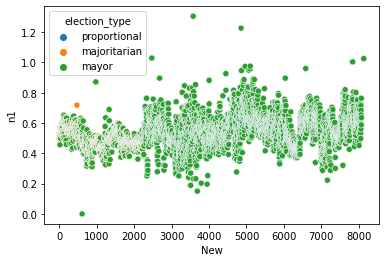

In [352]:
sns.scatterplot(x='New', y ='n1' ,
data = data2021_copy,hue = 'election_type' )

როგორც ვხედავთ ერთ-ერთი მაჩვენებელი შესამჩნევად დაბლააა სხვებისგან განცალკევებით, ზევით მყოფებიც არიან მაგრამ რამდენიმეა განაწილებული და ასე თვალით ვერ ვიტყვით რომ ანომალიაა...

<AxesSubplot:xlabel='division_id', ylabel='n1'>

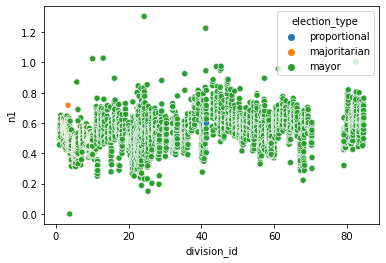

In [353]:
sns.scatterplot(x='division_id', y ='n1' ,
data = data2021_copy,hue = 'election_type' )

აქაც ვხედავთ ცალკე მდგომს, სავარაუდოდ ეს მონაცემი უნდა იყოს ზევით მყოფი...როგორც ვხედავთ ეს mayor ტიპისაა და ახლა ცალ-ცალკეც ვნახოთ სხვებზე

In [354]:
del data2021_copy['n1']
d2021_p=data2021_copy[data2021_copy['election_type']=='proportional']
d2021_maj=data2021_copy[data2021_copy['election_type']=='majoritarian']
d2021_mayor=data2021_copy[data2021_copy['election_type']=='mayor']

<AxesSubplot:xlabel='New', ylabel='n12'>

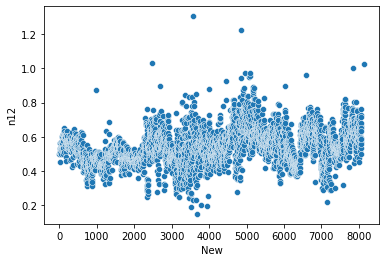

In [355]:
d2021_p.insert(0,'n12',d2021_p['participated']/d2021_p['total_registered_voters'])
sns.scatterplot(x='New', y ='n12' ,
data = d2021_p )

<AxesSubplot:xlabel='New', ylabel='n13'>

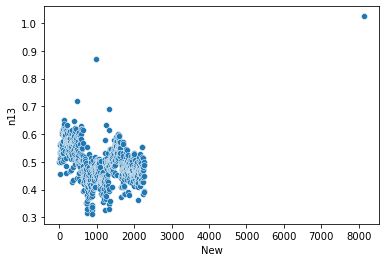

In [356]:
d2021_maj.insert(0,'n13',d2021_maj['participated']/d2021_maj['total_registered_voters'])
sns.scatterplot(x='New', y ='n13' ,
data = d2021_maj )

აქაც ვამჩნევთ ამ ცალკე მდგარ წერტილს რომელიც შესამჩნევად ზევითაა შედარებით...

In [357]:
d2021_maj.sort_values(by=['n13'])

,n13,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
872,0.312204,872,5,5 ისანი,5.450,0,majoritarian,0,0,1688,...,NaN,25.0,43.0,NaN,234.0,NaN,23.0,1696,31.073113,0.561032
731,0.315395,731,4,4 კრწანისი,4.300,0,majoritarian,0,0,1468,...,NaN,11.0,5.0,56.0,165.0,NaN,5.0,1480,31.283784,0.489580
1232,0.324704,1232,6,6 სამგორი,6.830,0,majoritarian,0,0,1352,...,NaN,17.0,39.0,NaN,188.0,NaN,14.0,1358,32.326951,0.449223
869,0.327857,869,5,5 ისანი,5.440,0,majoritarian,0,1,1339,...,NaN,29.0,53.0,NaN,160.0,NaN,14.0,1349,32.542624,0.446245
746,0.329649,746,5,5 ისანი,5.030,0,majoritarian,0,0,1538,...,NaN,26.0,41.0,NaN,239.0,NaN,29.0,1547,32.773109,0.511743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.651197,114,1,1 მთაწმინდა,1.390,0,majoritarian,0,2,1379,...,NaN,43.0,92.0,NaN,517.0,38.0,17.0,1380,65.072464,0.456500
1328,0.688944,1328,6,6 სამგორი,6.115,0,majoritarian,0,0,1212,...,NaN,28.0,76.0,NaN,363.0,NaN,32.0,1644,50.790754,0.543831
467,0.717773,467,3,3 საბურთალო,3.380,0,majoritarian,0,0,1024,...,NaN,68.0,87.0,NaN,258.0,108.0,54.0,1035,71.014493,0.342375
971,0.871007,971,5,5 ისანი,5.780,0,majoritarian,0,2,814,...,NaN,33.0,73.0,NaN,402.0,NaN,20.0,1294,54.791345,0.428052


In [358]:
a=d2021_maj[d2021_maj['New']==8134]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n13
[1.025]
-------------------------
New
[8134]
-------------------------
district_id
[10]
-------------------------
district_alt_id
['10 გლდანი']
-------------------------
division_id
[10.112]
-------------------------
division_is_covid
[0]
-------------------------
election_type
['majoritarian']
-------------------------
covid_station
[0]
-------------------------
global_sample
[0]
-------------------------
total_registered_voters
[120]
-------------------------
invalid_ballots
[0]
-------------------------
participated
[123]
-------------------------
special_voters
[6]
-------------------------
total_votes
[108]
-------------------------
disbalance_num
[15]
-------------------------
is_balanced
[0]
-------------------------
CAND5
[nan]
-------------------------
CAND9
[2.]
-------------------------
CAND25
[5.]
-------------------------
CAND32
[3.]
-------------------------
CAND41
[94.]
-------------------------
CAND45
[nan]
-------------------------
CAND48
[1.]
---------------------

In [359]:
p(pd.DataFrame(d2021_maj['n13'])).min()

n13            1.398710e-13
probability    1.956389e-26
dtype: float64

როგორც ვხედავთ ალბათობა ძალიან მცირეა თუმცა ასე გადაჭრით რომ ვთქვათ ანომალიააო არ შეიძლება რდაგან თუ დავუკვირდებით ჩვენ ვადგენთ მონაწილეების აქტივობას და სრულიად შესაძლებელია  ამ უბანზე აქტივობა მაღალი იყოს და ანომალიას არ წარმოადგენდეს ...

In [360]:
d=data2020_m[data2020_m['division_id']=='10.112']
d

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated,participated_confidence,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [361]:
d=data2016_m[data2016_m['division_id']==10.112]
d

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


In [362]:
d=data2018[data2018['division_id']==10.112]
d

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other


ძველ მონაცემებში არაა რეგისტრირებული ამ აიდით საარჩევნო უბანი, ასე რომ ძნელია თქმა ანომალიაა თუ არა კონკრეტული მოვლენა ნაკლები ინფორმაციის გამო , მაგრამ როგორც ვხედავთ participated  მეტია ვიდრე დარეგისტრირებულთ რაოდენობა და შეგვიძლია ეს საარჩევნო ადგილი ანომალიად მივიჩნიოთ...

<AxesSubplot:xlabel='New', ylabel='n14'>

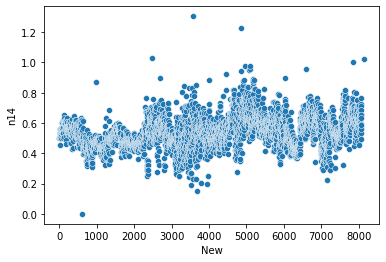

In [363]:
d2021_mayor.insert(0,'n14',d2021_mayor['participated']/d2021_mayor['total_registered_voters'])
sns.scatterplot(x='New', y ='n14' ,
data = d2021_mayor )

In [364]:
d2021_mayor.sort_values(by=['n14'])

,n14,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
606,0.000000,606,3,3 საბურთალო,3.840,0,mayor,0,1,1532,...,224.0,31.0,93.0,NaN,353.0,NaN,50.0,1542,0.000000,0.510089
3687,0.150121,3687,25,25 წალკა,25.330,0,mayor,0,0,413,...,6.0,NaN,NaN,NaN,39.0,NaN,NaN,415,14.939759,0.137281
3507,0.188817,3507,23,23 ბოლნისი,23.550,0,mayor,0,0,1234,...,110.0,NaN,NaN,NaN,91.0,NaN,NaN,1249,18.654924,0.413166
3949,0.196319,3949,28,28 დუშეთი,28.340,0,mayor,0,0,163,...,1.0,NaN,3.0,NaN,26.0,NaN,NaN,163,19.631902,0.053920
3791,0.202830,3791,26,26 თეთრიწყარო,26.410,0,mayor,0,0,424,...,26.0,NaN,NaN,NaN,55.0,NaN,NaN,437,19.679634,0.144558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,1.003236,7837,82,82 შუახევი,82.310,0,mayor,0,0,309,...,72.0,NaN,33.0,NaN,112.0,NaN,NaN,310,100.000000,0.102547
8135,1.025000,8135,10,10 გლდანი,10.112,0,mayor,0,0,120,...,10.0,1.0,4.0,NaN,101.0,NaN,0.0,126,97.619048,0.041680
2470,1.028571,2470,13,13 სიღნაღი,13.020,0,mayor,0,2,35,...,5.0,NaN,NaN,NaN,27.0,NaN,NaN,49,73.469388,0.016209
4855,1.225806,4855,41,41 ნინოწმინდა,41.150,0,mayor,0,0,62,...,9.0,NaN,NaN,NaN,40.0,NaN,NaN,94,80.851064,0.031095


In [365]:
a=d2021_mayor[d2021_mayor['New']==606]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n14
[0.]
-------------------------
New
[606]
-------------------------
district_id
[3]
-------------------------
district_alt_id
['3 საბურთალო']
-------------------------
division_id
[3.84]
-------------------------
division_is_covid
[0]
-------------------------
election_type
['mayor']
-------------------------
covid_station
[0]
-------------------------
global_sample
[1]
-------------------------
total_registered_voters
[1532]
-------------------------
invalid_ballots
[18]
-------------------------
participated
[0]
-------------------------
special_voters
[10]
-------------------------
total_votes
[784]
-------------------------
disbalance_num
[-802]
-------------------------
is_balanced
[0]
-------------------------
CAND5
[224.]
-------------------------
CAND9
[31.]
-------------------------
CAND25
[93.]
-------------------------
CAND32
[nan]
-------------------------
CAND41
[353.]
-------------------------
CAND45
[nan]
-------------------------
CAND48
[50.]
------------------------

In [366]:
p(pd.DataFrame(d2021_mayor['n14']))

,n14,probability
2,2.274574,5.173685e+00
5,2.310276,5.337373e+00
8,2.481268,6.156693e+00
11,2.357813,5.559283e+00
14,1.745910,3.048201e+00
...,...,...
8066,2.260751,5.110994e+00
8068,2.323871,5.400379e+00
8070,0.301377,9.082794e-02
8072,1.761329,3.102280e+00


აქ მონაწილეთა რაოდენობა 0-ია საერთოდ, ცხრილში ასევე ვამჩნევთ რომ ზოგან თანაფარდობა 1 ზე მეტია...

In [367]:
a=d2021_mayor[d2021_mayor['n14']>=1]
a

,n14,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
2470,1.028571,2470,13,13 სიღნაღი,13.020,0,mayor,0,2,35,...,5.0,NaN,NaN,NaN,27.0,NaN,NaN,49,73.469388,0.016209
3575,1.304348,3575,24,24 დმანისი,24.270,0,mayor,0,0,23,...,1.0,NaN,NaN,NaN,29.0,NaN,NaN,32,93.750000,0.010586
4855,1.225806,4855,41,41 ნინოწმინდა,41.150,0,mayor,0,0,62,...,9.0,NaN,NaN,NaN,40.0,NaN,NaN,94,80.851064,0.031095
7837,1.003236,7837,82,82 შუახევი,82.310,0,mayor,0,0,309,...,72.0,NaN,33.0,NaN,112.0,NaN,NaN,310,100.000000,0.102547
8135,1.025000,8135,10,10 გლდანი,10.112,0,mayor,0,0,120,...,10.0,1.0,4.0,NaN,101.0,NaN,0.0,126,97.619048,0.041680


In [368]:
a['participated']

2470     36
3575     30
4855     76
7837    310
8135    123
Name: participated, dtype: int64

In [369]:
a['total_registered_voters']

2470     35
3575     23
4855     62
7837    309
8135    120
Name: total_registered_voters, dtype: int64

კოვიდ ცენტრი როგორც ვხედავთ არცერთი არაა თუმცა დარეგისტრირებულ ადამიანებზე გაილებით მეტი მონაწილეა ხუთივე ადგილას...

ნახაზების აგება უკეთ აჩვენებს თუ სად შეგვიძლია ვეძებოთ ანომალია

პარტიებს როგორც უკვე აღვნიშნე დროებით გადავდებ და მანამდე ისევ ზევით მოცემული მახასიათებლების ირგვლივ შევეცდები ანომალიების მოძებნას...

In [379]:
data2021_copy=data2021[data2021['total_votes']!=0]

<AxesSubplot:xlabel='New', ylabel='n2'>

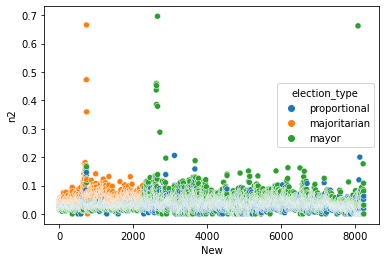

In [380]:
data2021_copy.insert(0,'n2',data2021_copy['invalid_ballots']/data2021_copy['total_votes'])
sns.scatterplot(x='New', y ='n2' ,
data = data2021_copy,hue='election_type' )

ერთი შეხედვით უკვე ვხედავთ ნახაზის საშუალებით სად შეიძლება ვეძებოთ ანომალია და განვიხილოთ ახლა ცალ-ცალკე...

In [381]:
del data2021_copy['n2']
d2021_p=data2021_copy[data2021_copy['election_type']=='proportional']
d2021_maj=data2021_copy[data2021_copy['election_type']=='majoritarian']
d2021_mayor=data2021_copy[data2021_copy['election_type']=='mayor']

<AxesSubplot:xlabel='New', ylabel='n22'>

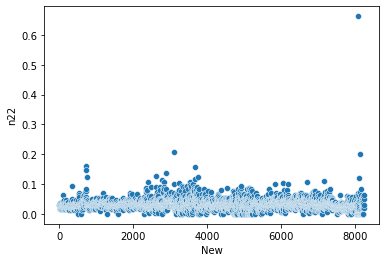

In [382]:
d2021_p.insert(0,'n22',d2021_p['invalid_ballots']/d2021_p['total_votes'])
sns.scatterplot(x='New', y ='n22' ,
data = d2021_p )

ზედა წერტილი აშკარად ანომალიური ქცევის შთაბეწდილებას ტოვებს და ვნახოთ ეს წერტილი...

In [383]:
d2021_p.sort_values(by=['n22'])

,n22,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8207,0.000000,8207,39,39 ასპინძა,39.24,1,proportional,1,0,0,...,3.0,0.0,0.0,0.0,21.0,0.0,0.0,28,92.857143,0.009262
3964,0.000000,3964,28,28 დუშეთი,28.42,0,proportional,0,0,190,...,2.0,1.0,6.0,0.0,36.0,0.0,0.0,201,23.880597,0.066490
8043,0.000000,8043,84,84 ხულო,84.40,0,proportional,0,0,511,...,115.0,2.0,13.0,0.0,154.0,0.0,0.0,511,58.512720,0.169037
7844,0.000000,7844,82,82 შუახევი,82.35,0,proportional,0,2,188,...,16.0,3.0,2.0,0.0,89.0,1.0,0.0,189,61.904762,0.062521
8049,0.000000,8049,84,84 ხულო,84.43,0,proportional,0,2,174,...,20.0,3.0,12.0,0.0,56.0,0.0,0.0,176,56.250000,0.058220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,0.158333,3662,25,25 წალკა,25.21,0,proportional,0,0,262,...,22.0,0.0,1.0,0.0,68.0,0.0,0.0,267,52.059925,0.088323
727,0.160671,727,4,4 კრწანისი,4.29,0,proportional,0,2,1386,...,157.0,2.0,2.0,0.0,235.0,0.0,0.0,1396,34.598854,0.461793
8123,0.200000,8123,21,21 გარდაბანი,21.66,1,proportional,1,0,0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,12,50.000000,0.003970
3111,0.205882,3111,21,21 გარდაბანი,21.12,0,proportional,0,2,672,...,63.0,0.0,0.0,0.0,106.0,0.0,0.0,684,26.023392,0.226265


<AxesSubplot:xlabel='New', ylabel='n23'>

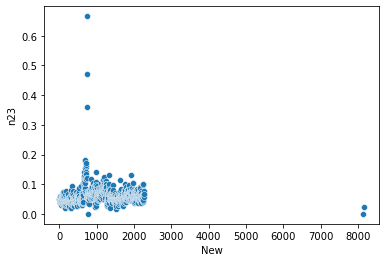

In [384]:
d2021_maj.insert(0,'n23',d2021_maj['invalid_ballots']/d2021_maj['total_votes'])
sns.scatterplot(x='New', y ='n23' ,
data = d2021_maj )

In [385]:
p(pd.DataFrame(d2021_maj['n23']))

,n23,probability
1,2.338318,5.467729
4,2.036488,4.147284
7,2.324398,5.402826
10,2.125418,4.517403
13,2.053615,4.217335
...,...,...
2258,2.283480,5.214280
2261,2.478346,6.142198
2264,2.496074,6.230386
8134,0.562556,0.316470


In [387]:
d2021_maj.sort_values(by=['n23'])

,n23,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
758,0.000000,758,5,5 ისანი,5.070,0,majoritarian,0,2,1523,...,NaN,35.0,64.0,NaN,283.0,NaN,35.0,1529,42.184434,0.505789
8134,0.000000,8134,10,10 გლდანი,10.112,0,majoritarian,0,0,120,...,NaN,2.0,5.0,3.0,94.0,NaN,1.0,126,97.619048,0.041680
1520,0.015873,1520,8,8 დიდუბე,8.170,0,majoritarian,0,0,702,...,NaN,16.0,35.0,NaN,208.0,63.0,19.0,720,54.166667,0.238174
141,0.019403,141,2,2 ვაკე,2.070,0,majoritarian,0,3,1108,...,NaN,50.0,64.0,179.0,295.0,NaN,37.0,1124,61.387900,0.371816
1367,0.019553,1367,7,7 ჩუღურეთი,7.090,0,majoritarian,0,2,1492,...,NaN,75.0,60.0,NaN,343.0,NaN,63.0,1506,50.000000,0.498181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,0.177458,674,4,4 კრწანისი,4.110,0,majoritarian,0,3,1104,...,NaN,40.0,45.0,65.0,181.0,NaN,13.0,1150,42.695652,0.380417
695,0.181034,695,4,4 კრწანისი,4.180,0,majoritarian,0,0,1090,...,NaN,31.0,26.0,44.0,256.0,NaN,13.0,1099,49.863512,0.363546
734,0.359281,734,4,4 კრწანისი,4.310,0,majoritarian,0,0,1266,...,NaN,26.0,11.0,32.0,214.0,NaN,7.0,1275,35.607843,0.421766
728,0.472561,728,4,4 კრწანისი,4.290,0,majoritarian,0,2,1386,...,NaN,4.0,1.0,26.0,250.0,NaN,0.0,1396,34.598854,0.461793


ანომალიური მონაცემებში არაფერი ჩანს...

<AxesSubplot:xlabel='New', ylabel='n24'>

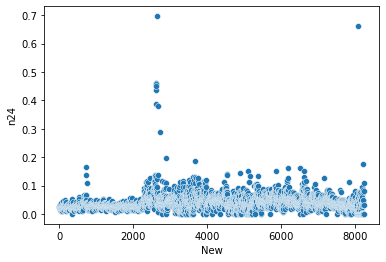

In [388]:
d2021_mayor.insert(0,'n24',d2021_mayor['invalid_ballots']/d2021_mayor['total_votes'])
sns.scatterplot(x='New', y ='n24' ,
data = d2021_mayor )

In [389]:
d2021_mayor.sort_values(by=['n24'])

,n24,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8230,0.000000,8230,79,79 ბათუმი,79.105,0,mayor,1,0,0,...,4.0,NaN,0.0,NaN,29.0,0.0,NaN,34,97.058824,0.011247
8078,0.000000,8078,7,7 ჩუღურეთი,7.510,1,mayor,1,0,0,...,9.0,2.0,6.0,NaN,19.0,NaN,1.0,56,71.428571,0.018525
8084,0.000000,8084,15,15 ლაგოდეხი,15.380,1,mayor,1,0,0,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,52,59.615385,0.017201
3587,0.000000,3587,24,24 დმანისი,24.330,0,mayor,0,0,63,...,16.0,NaN,NaN,NaN,19.0,NaN,NaN,74,47.297297,0.024479
3575,0.000000,3575,24,24 დმანისი,24.270,0,mayor,0,0,23,...,1.0,NaN,NaN,NaN,29.0,NaN,NaN,32,93.750000,0.010586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,0.451713,2624,15,15 ლაგოდეხი,15.210,0,mayor,0,0,1340,...,NaN,NaN,NaN,NaN,247.0,NaN,NaN,1348,34.569733,0.445915
2622,0.457399,2622,15,15 ლაგოდეხი,15.200,0,mayor,0,0,1837,...,NaN,NaN,NaN,NaN,304.0,NaN,NaN,1840,38.152174,0.608667
2620,0.460227,2620,15,15 ლაგოდეხი,15.190,0,mayor,0,0,1297,...,NaN,NaN,NaN,NaN,180.0,NaN,NaN,1309,39.419404,0.433014
8074,0.662338,8074,17,17 თელავი,17.550,1,mayor,1,0,0,...,31.0,NaN,4.0,NaN,42.0,NaN,NaN,115,66.956522,0.038042


ახლა დავთვალოთ ხმების რაოდენობასა და დარეგისტრირებულთა შორის დამოკიდებულება...

<AxesSubplot:xlabel='New', ylabel='n3'>

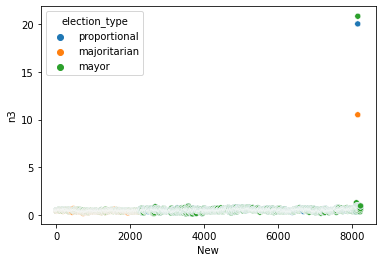

In [390]:
data2021_copy.insert(0,'n3',data2021_copy['total_votes']/data2021_copy['total_registered_plus_special'])
sns.scatterplot(x='New', y ='n3' ,
data = data2021_copy,hue='election_type' )

აქაც სამ ანომალიურ წერტილს ვამჩნევთ და თუ ეს ჩვენი ნაპოვნი წერტილებია წავშალოთ და მათ გარეშე შევხედოთ მთლიან სურათს ჯერ

In [391]:
data2021_copy.sort_values(by=['n3'])

,n3,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
3687,0.132530,3687,25,25 წალკა,25.330,0,mayor,0,0,413,...,6.0,NaN,NaN,NaN,39.0,NaN,NaN,415,14.939759,0.137281
3686,0.142169,3686,25,25 წალკა,25.330,0,proportional,0,0,413,...,9.0,2.0,8.0,0.0,37.0,0.0,0.0,415,14.939759,0.137281
3507,0.160929,3507,23,23 ბოლნისი,23.550,0,mayor,0,0,1234,...,110.0,NaN,NaN,NaN,91.0,NaN,NaN,1249,18.654924,0.413166
3506,0.175340,3506,23,23 ბოლნისი,23.550,0,proportional,0,0,1234,...,108.0,5.0,2.0,0.0,89.0,3.0,0.0,1249,18.654924,0.413166
3949,0.184049,3949,28,28 დუშეთი,28.340,0,mayor,0,0,163,...,1.0,NaN,3.0,NaN,26.0,NaN,NaN,163,19.631902,0.053920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,1.000000,8199,52,52 ბაღდათი,52.310,1,proportional,1,0,0,...,2.0,2.0,0.0,0.0,35.0,0.0,0.0,40,100.000000,0.013232
8118,1.300000,8118,55,55 ხონი,55.300,1,mayor,1,0,0,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,20,100.000000,0.006616
8155,10.500000,8155,10,10 გლდანი,10.113,0,majoritarian,0,0,0,...,NaN,1.0,0.0,8.0,29.0,NaN,0.0,4,1075.000000,0.001323
8154,20.000000,8154,10,10 გლდანი,10.113,0,proportional,0,0,0,...,26.0,3.0,12.0,2.0,133.0,5.0,0.0,10,2170.000000,0.003308


როგორც ვხედავთ ბოლო  წერტილები საკმაოდ ანომალიურია ,დარეგსტრირებულთა რაოდენობაზე ბევრად მეტი ხმაა დაფიქსირებული, კოვიდ ცენტრიც არააა თან ბოლო სამი...

In [399]:
b=data2021_copy[data2021_copy['division_id']==10.113]
b

,n3,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8154,20.0,8154,10,10 გლდანი,10.113,0,proportional,0,0,0,...,26.0,3.0,12.0,2.0,133.0,5.0,0.0,10,2170.0,0.003308
8155,10.5,8155,10,10 გლდანი,10.113,0,majoritarian,0,0,0,...,NaN,1.0,0.0,8.0,29.0,NaN,0.0,4,1075.0,0.001323
8156,20.8,8156,10,10 გლდანი,10.113,0,mayor,0,0,0,...,38.0,1.0,12.0,NaN,141.0,NaN,4.0,10,2170.0,0.003308


In [400]:
a=b[b["New"]==8154]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n3
[20.]
-------------------------
New
[8154]
-------------------------
district_id
[10]
-------------------------
district_alt_id
['10 გლდანი']
-------------------------
division_id
[10.113]
-------------------------
division_is_covid
[0]
-------------------------
election_type
['proportional']
-------------------------
covid_station
[0]
-------------------------
global_sample
[0]
-------------------------
total_registered_voters
[0]
-------------------------
invalid_ballots
[17]
-------------------------
participated
[217]
-------------------------
special_voters
[10]
-------------------------
total_votes
[200]
-------------------------
disbalance_num
[0]
-------------------------
is_balanced
[1]
-------------------------
CAND5
[26.]
-------------------------
CAND9
[3.]
-------------------------
CAND25
[12.]
-------------------------
CAND32
[2.]
-------------------------
CAND41
[133.]
-------------------------
CAND45
[5.]
-------------------------
CAND48
[0.]
------------------------

In [401]:
a=b[b["New"]==8155]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n3
[10.5]
-------------------------
New
[8155]
-------------------------
district_id
[10]
-------------------------
district_alt_id
['10 გლდანი']
-------------------------
division_id
[10.113]
-------------------------
division_is_covid
[0]
-------------------------
election_type
['majoritarian']
-------------------------
covid_station
[0]
-------------------------
global_sample
[0]
-------------------------
total_registered_voters
[0]
-------------------------
invalid_ballots
[1]
-------------------------
participated
[43]
-------------------------
special_voters
[4]
-------------------------
total_votes
[42]
-------------------------
disbalance_num
[0]
-------------------------
is_balanced
[1]
-------------------------
CAND5
[nan]
-------------------------
CAND9
[1.]
-------------------------
CAND25
[0.]
-------------------------
CAND32
[8.]
-------------------------
CAND41
[29.]
-------------------------
CAND45
[nan]
-------------------------
CAND48
[0.]
-------------------------
to

In [402]:
a=b[b["New"]==8156]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n3
[20.8]
-------------------------
New
[8156]
-------------------------
district_id
[10]
-------------------------
district_alt_id
['10 გლდანი']
-------------------------
division_id
[10.113]
-------------------------
division_is_covid
[0]
-------------------------
election_type
['mayor']
-------------------------
covid_station
[0]
-------------------------
global_sample
[0]
-------------------------
total_registered_voters
[0]
-------------------------
invalid_ballots
[9]
-------------------------
participated
[217]
-------------------------
special_voters
[10]
-------------------------
total_votes
[208]
-------------------------
disbalance_num
[0]
-------------------------
is_balanced
[1]
-------------------------
CAND5
[38.]
-------------------------
CAND9
[1.]
-------------------------
CAND25
[12.]
-------------------------
CAND32
[nan]
-------------------------
CAND41
[141.]
-------------------------
CAND45
[nan]
-------------------------
CAND48
[4.]
-------------------------
tot

ამ უბანშიც დარეგისტრირებულთა რაოდენობა 0 ია და ძნელია ზუსტად იმის თქმა ანომალიაა თუ არაა თუმცა მოცემული მონაცემების მიხედვით ამ ეტაპზე შგვიძლია ანომალია ვუწოდოთ ამ წერტილს...თუმცა ცხადია არაა გამორიცხული კოვიდ ცენტრი იყოს და მითითებული არ იყოს მონაცემებში...

In [403]:
data2021_copy.sort_values(by=['n3'])

,n3,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
3687,0.132530,3687,25,25 წალკა,25.330,0,mayor,0,0,413,...,6.0,NaN,NaN,NaN,39.0,NaN,NaN,415,14.939759,0.137281
3686,0.142169,3686,25,25 წალკა,25.330,0,proportional,0,0,413,...,9.0,2.0,8.0,0.0,37.0,0.0,0.0,415,14.939759,0.137281
3507,0.160929,3507,23,23 ბოლნისი,23.550,0,mayor,0,0,1234,...,110.0,NaN,NaN,NaN,91.0,NaN,NaN,1249,18.654924,0.413166
3506,0.175340,3506,23,23 ბოლნისი,23.550,0,proportional,0,0,1234,...,108.0,5.0,2.0,0.0,89.0,3.0,0.0,1249,18.654924,0.413166
3949,0.184049,3949,28,28 დუშეთი,28.340,0,mayor,0,0,163,...,1.0,NaN,3.0,NaN,26.0,NaN,NaN,163,19.631902,0.053920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8199,1.000000,8199,52,52 ბაღდათი,52.310,1,proportional,1,0,0,...,2.0,2.0,0.0,0.0,35.0,0.0,0.0,40,100.000000,0.013232
8118,1.300000,8118,55,55 ხონი,55.300,1,mayor,1,0,0,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,20,100.000000,0.006616
8155,10.500000,8155,10,10 გლდანი,10.113,0,majoritarian,0,0,0,...,NaN,1.0,0.0,8.0,29.0,NaN,0.0,4,1075.000000,0.001323
8154,20.000000,8154,10,10 გლდანი,10.113,0,proportional,0,0,0,...,26.0,3.0,12.0,2.0,133.0,5.0,0.0,10,2170.000000,0.003308


8118 უბანზეც ალბათობა ერთის ტოლია...

In [405]:
a=data2021_copy[data2021_copy['New']==8118]
for i in a.columns:
    print(i)
    print(a[i].unique())
    print('-------------------------')

n3
[1.3]
-------------------------
New
[8118]
-------------------------
district_id
[55]
-------------------------
district_alt_id
['55 ხონი']
-------------------------
division_id
[55.3]
-------------------------
division_is_covid
[1]
-------------------------
election_type
['mayor']
-------------------------
covid_station
[1]
-------------------------
global_sample
[0]
-------------------------
total_registered_voters
[0]
-------------------------
invalid_ballots
[0]
-------------------------
participated
[20]
-------------------------
special_voters
[20]
-------------------------
total_votes
[26]
-------------------------
disbalance_num
[-6]
-------------------------
is_balanced
[0]
-------------------------
CAND5
[nan]
-------------------------
CAND9
[nan]
-------------------------
CAND25
[nan]
-------------------------
CAND32
[nan]
-------------------------
CAND41
[17.]
-------------------------
CAND45
[nan]
-------------------------
CAND48
[nan]
-------------------------
total_re

ამ წერტილში როგორც ჩანს მონაცემები არაზუსტად გვაქვს და ვერაფერს ვიტყვით რადგან პარტიების ხმებიც უცნობია, ძნელია თქმა ანომალიაა თუ არა თუმცა ხმების მიხედვით ვერ ვისმჯელებთ რადგან კოვიდ ცენტრია,რაც გასათვალისწინებელი ფაქტია ამ მხრივ...

ახლა მოდი შევუდგეთ პარტიების მიხედვით განხილვას...

In [406]:
data2021_copy1=data2021.copy()

In [407]:
data2021_copy1.dropna(subset = ["CAND5"], inplace=True)

In [408]:
data2021_copy.shape

(8230, 26)

In [409]:
data2021_copy2=data2021.copy()
data2021_copy2.dropna(subset = ["CAND9"], inplace=True)

In [410]:
data2021_copy3=data2021.copy()
data2021_copy3.dropna(subset = ["CAND25"], inplace=True)

In [411]:
data2021_copy4=data2021.copy()
data2021_copy4.dropna(subset = ["CAND32"], inplace=True)

In [412]:
data2021_copy5=data2021.copy()
data2021_copy5.dropna(subset = ["CAND41"], inplace=True)

In [413]:
data2021_copy6=data2021.copy()
data2021_copy6.dropna(subset = ["CAND45"], inplace=True)

In [414]:
data2021_copy7=data2021.copy()
data2021_copy7.dropna(subset = ["CAND48"], inplace=True)

კონკრეტული პარტიის ნალიანი სვეტები წავშალეთ რადგან ამით ვერაფერს ვერ გავიგებდით და ახლა დავიწყოთ სათითაოდ ჯერ მთლიანი სურათის ხოლო შემდგომ საარჩევნო ტიპების მიხედვით განხილვა და შესაძლო ანომალიების აღმოჩენა...

# CAND5

In [422]:
data2021_copy1.shape

(7208, 26)

<AxesSubplot:xlabel='New', ylabel='n'>

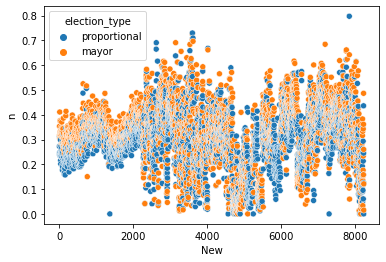

In [420]:
data2021_copy1.insert(0,'n',data2021_copy1['CAND5']/data2021_copy1['total_votes'])
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy1,hue='election_type' )

In [423]:
data2021_copy1.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
4760,0.000000,4760,40,40 ახალქალაქი,40.38,0,proportional,0,0,120,...,0.0,0.0,3.0,0.0,82.0,0.0,0.0,124,73.387097,0.041019
4730,0.000000,4730,40,40 ახალქალაქი,40.23,0,proportional,0,0,108,...,0.0,6.0,0.0,0.0,37.0,0.0,0.0,109,65.137615,0.036057
1363,0.000000,1363,7,7 ჩუღურეთი,7.08,0,proportional,0,1,1442,...,0.0,23.0,42.0,5.0,288.0,22.0,26.0,1454,47.248968,0.480979
4780,0.000000,4780,40,40 ახალქალაქი,40.48,0,proportional,0,0,87,...,0.0,4.0,0.0,0.0,48.0,0.0,0.0,90,72.222222,0.029772
4822,0.000000,4822,40,40 ახალქალაქი,40.69,0,proportional,0,0,694,...,0.0,31.0,1.0,0.0,328.0,0.0,0.0,703,54.196302,0.232550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,0.705882,3592,24,24 დმანისი,24.36,0,proportional,0,2,252,...,96.0,2.0,0.0,0.0,33.0,0.0,0.0,259,52.895753,0.085676
3612,0.709302,3612,24,24 დმანისი,24.46,0,proportional,0,0,454,...,122.0,0.0,0.0,0.0,42.0,0.0,0.0,463,37.796976,0.153159
3593,0.725926,3593,24,24 დმანისი,24.36,0,mayor,0,2,252,...,98.0,NaN,NaN,NaN,37.0,NaN,NaN,259,52.895753,0.085676
3596,0.729614,3596,24,24 დმანისი,24.38,0,proportional,0,0,475,...,170.0,1.0,0.0,0.0,58.0,0.0,0.0,479,50.104384,0.158452


ჯერ-ჯერობით თვალით არ შეიმჩნევა რაიმე მკვეთრი გადახრა  სადაც შეიძლება ვეძებოთ ანომალია ...

In [432]:
data2021_copy11=data2021_copy1[data2021_copy1['election_type']=='proportional']
data2021_copy12=data2021_copy1[data2021_copy1['election_type']=='majoritarian']
data2021_copy13=data2021_copy1[data2021_copy1['election_type']=='mayor']

In [433]:
data2021_copy11

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
0,0.272446,0,1,1 მთაწმინდა,1.010,0,proportional,0,0,1338,...,176.0,23.0,67.0,23.0,232.0,31.0,21.0,1350,49.481481,0.446576
3,0.241158,3,1,1 მთაწმინდა,1.020,0,proportional,0,0,1270,...,150.0,26.0,59.0,24.0,253.0,34.0,18.0,1283,49.805144,0.424413
6,0.311518,6,1,1 მთაწმინდა,1.030,0,proportional,0,2,1479,...,238.0,29.0,59.0,24.0,274.0,32.0,20.0,1495,52.508361,0.494542
9,0.248311,9,1,1 მთაწმინდა,1.040,0,proportional,0,1,1185,...,147.0,12.0,71.0,16.0,226.0,20.0,19.0,1198,50.333890,0.396295
12,0.236111,12,1,1 მთაწმინდა,1.050,0,proportional,0,3,1612,...,170.0,39.0,91.0,19.0,271.0,25.0,25.0,1622,45.314427,0.536553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8221,0.260000,8221,27,27 მცხეთა,27.470,1,proportional,1,0,0,...,13.0,1.0,1.0,0.0,29.0,0.0,0.0,91,56.043956,0.030103
8223,0.435897,8223,30,30 კასპი,30.390,1,proportional,1,0,0,...,17.0,1.0,3.0,0.0,15.0,0.0,0.0,67,61.194030,0.022163
8225,0.245283,8225,58,58 წყალტუბო,58.690,1,proportional,1,0,0,...,13.0,3.0,0.0,0.0,29.0,0.0,0.0,72,75.000000,0.023817
8227,0.000000,8227,58,58 წყალტუბო,58.680,0,proportional,1,0,0,...,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494


<AxesSubplot:xlabel='New', ylabel='n'>

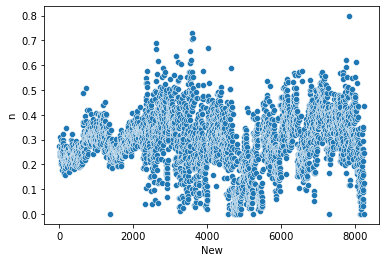

In [434]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy11 )

In [435]:
data2021_copy11.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8123,0.000000,8123,21,21 გარდაბანი,21.66,1,proportional,1,0,0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,12,50.000000,0.003970
4822,0.000000,4822,40,40 ახალქალაქი,40.69,0,proportional,0,0,694,...,0.0,31.0,1.0,0.0,328.0,0.0,0.0,703,54.196302,0.232550
4780,0.000000,4780,40,40 ახალქალაქი,40.48,0,proportional,0,0,87,...,0.0,4.0,0.0,0.0,48.0,0.0,0.0,90,72.222222,0.029772
8227,0.000000,8227,58,58 წყალტუბო,58.68,0,proportional,1,0,0,...,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494
4562,0.000000,4562,37,37 ახალციხე,37.15,0,proportional,0,1,708,...,0.0,5.0,12.0,0.0,282.0,0.0,0.0,710,66.338028,0.234866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,0.690428,2619,15,15 ლაგოდეხი,15.19,0,proportional,0,0,1297,...,339.0,1.0,1.0,0.0,139.0,0.0,0.0,1309,39.419404,0.433014
3592,0.705882,3592,24,24 დმანისი,24.36,0,proportional,0,2,252,...,96.0,2.0,0.0,0.0,33.0,0.0,0.0,259,52.895753,0.085676
3612,0.709302,3612,24,24 დმანისი,24.46,0,proportional,0,0,454,...,122.0,0.0,0.0,0.0,42.0,0.0,0.0,463,37.796976,0.153159
3596,0.729614,3596,24,24 დმანისი,24.38,0,proportional,0,0,475,...,170.0,1.0,0.0,0.0,58.0,0.0,0.0,479,50.104384,0.158452


In [467]:
k=p(data2021_copy11.sort_values(by=['n'])['n'])
k=pd.DataFrame(data=k)
k

,probability
8123,2.359249e-100
4822,2.359249e-100
4780,2.359249e-100
8227,2.359249e-100
4562,2.359249e-100
...,...
2619,1.664870e-183
3592,3.831823e-198
3612,1.855903e-201
3596,1.039781e-221


In [469]:
k.sort_values(by=['probability'])

,probability
7838,6.140204e-296
3596,1.039781e-221
3612,1.855903e-201
3592,3.831823e-198
2619,1.664870e-183
...,...
451,2.929736e+01
3237,2.929753e+01
3143,2.929790e+01
1096,2.929839e+01


შევამოწმოთ ბოლო ორი როგორც ვხედავთ  ალბათობა ძალიან მცირეა,7838 და 3596...

In [472]:
 data2016_p[data2016_p['district_id']==82]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


In [473]:
data2020_p[data2020_p['district_id']==82]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [479]:
 data2016_p[data2016_p['district_id']==82]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


7838 ის შესბამისი არ მოიძებნა ასე რომ ვერ ვიტყვით ზუსტად ანომალიაა თუ არა, შეიძლება უბრალოდ იმ ადგილას ამ პარტიის მომხრეა ბევრი ან უბრალოდ ამ პარტიის მომხრენი იყვნენ საარჩვენო უბანზე აქტიურები...

In [474]:
 data2016_p[data2016_p['district_id']==24]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
3344,41.744601,45.796611,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ.გურჯაანის,მუსიკალური სკოლა,ქ. გურჯაანი ი.ნონეშვილის გამზირი #21,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,16,2,26,20,19,27,299,231,37,33
3345,41.747191,45.812453,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ.გურჯაანის,ყოფ.ცეკავ. ხე-ტყის ადმინ. შენობა,ქ. გურჯაანი სააკაძის ქ.#6,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,13,5,27,31,14,38,207,281,17,42
3346,41.750147,45.790149,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ.გურჯაანის,#3 საჯარო სკოლა,ქ. გურჯაანი თაყაიშვილის ქ.#11,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,35,3,29,20,16,21,261,170,29,18
3347,41.750108,45.800965,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ.გურჯაანის,#2 საბავშვო ბაღი,ქ. გურჯაანი 9 აპრილის ქ.#39,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,19,3,32,46,17,29,308,241,21,38
3348,41.745359,45.784987,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ.გურჯაანის,დოსააფის შენობა,ქ. გურჯაანი ფარნავაზის ქ.#6,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,11,3,27,25,15,35,229,230,17,28
3349,41.846571,45.652764,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ.ვაჩნაძიანის,საჯარო სკოლა,ს. ვაჩნაძიანი მე-13 ქუჩა #33,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,26,3,44,22,18,22,361,186,49,47
3350,41.838616,45.666204,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ. კალაურის,საჯარო სკოლა,ს. კალაური 1-ლი ქუჩის 1-ლი შესახ.,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,11,2,23,29,14,11,312,140,40,14
3351,41.831104,45.676743,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ. შაშიანის,საბავშვო ბაღი,ს. შაშიანი 23-ე ქუჩა #6,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,44,3,28,25,9,18,225,197,22,53
3352,41.829817,45.674522,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ. შაშიანის,საჯარო სკოლა,ს. შაშიანი 22-ე ქუჩა #3,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,17,3,24,45,23,13,402,154,34,34
3353,41.825684,45.692954,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სოფ. ვაზისუბნის,კულტურის სახლი,ს. ვაზისუბანი 1-ლი ქუჩა #115,NaN,https://archiveresults.cec.gov.ge/results/2016...,24,...,19,2,32,63,29,30,284,240,43,56


In [478]:
 data2020_p[data2020_p['district_id']==24]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
3288,41.931379,41.993481,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N3 საჯარო სკოლა,ოზურგეთი ბათუმის ქ. N 87,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,17,3,18,21,30,446,82,32,39,83
3289,41.927140,41.999723,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,სპორტის სასახლე,ოზურგეთი კოსტავას ქ N 3,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,37,3,17,18,8,372,103,20,23,81
3290,41.922288,41.990753,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N4 საბავშვო ბაღი,ოზურგეთი ნიკო ნიკოლაძის N55,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,15,2,37,37,16,299,121,29,11,61
3291,41.926075,41.998997,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N 4 საჯარო სკოლა,ოზურგეთი ი. გოგებაშვილის N 8,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,25,3,19,27,21,389,126,24,31,85
3292,41.923829,42.005950,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,კოლეჯი „ჰორიზონტი”,ოზურგეთი რუსთაველის ქ N 8,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,14,3,23,25,11,358,101,17,13,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,41.972840,42.211672,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N35 ხიდისთავი,საჯარო სკოლის დარბაზი,სოფ. ხიდისთავი,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,13,3,15,10,4,264,71,6,25,33
3423,41.986116,42.206340,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N36 ახალშენი,ახალგაზრდული ცენტრი,სოფ. ახალშენი,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,1,3,2,5,0,106,43,0,19,21
3424,41.956002,42.196979,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N37 ჭაჭიეთი,კერძო სახლი,სოფ. ჭაჭიეთი,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,7,3,3,1,1,55,18,0,6,3
3425,42.020552,42.241139,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N38 დაბა,ბიბლიოთეკა,ჩოხატაური დუმბაძის ქ. N10,NaN,https://archiveresults.cec.gov.ge/results/2020...,24,...,25,3,37,5,13,298,39,22,36,49


In [482]:
data2018[data2018['district_id']==24]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
42,41.411524,44.200081,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ბახჩალარის N30,საჯარო სკოლის შენობა,სოფ.ბახჩალარი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,0,3,1,7,0,0,33,20,3
60,41.206176,44.141677,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ირგანჩაის N22,საჯარო სკოლის შენობა,სოფ.ირგანჩაი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,20,3,2,20,5,0,313,235,11
78,41.329406,44.342476,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,პატარა დმანისის N18,ამირან დემურაშვილის არასაცხოვრებელი ფართი,სოფ.პატარა დმანისი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,0,3,4,14,2,0,65,10,4
87,41.495772,44.127934,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,სარკინეთის N35,ყოფილი მეურნეობის ოფისი,სოფ.სარკინეთი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,2,0,3,5,9,0,0,89,21,2
90,41.450526,44.105661,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ახის N41,ივანე ბერუაშვილის საცხოვრებელი სახლი,სოფ.ახა,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,2,0,3,0,4,1,0,27,7,1
111,41.442035,44.170880,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,კიზილაჯლოს N26,საჯარო სკოლის შენობა,სოფ.კიზილაჯლო,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,2,3,0,7,0,1,73,65,1
224,41.253623,44.295235,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,გორას N34,ილია ორფანოვის საცხოვრებელი სახლი,სოფ.გორა,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,0,3,0,4,0,0,23,3,1
243,41.324999,44.231444,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,დალარის N36,საჯარო სკოლის შენობა,სოფ.დალარი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,4,3,1,18,0,0,51,52,1
343,41.401704,44.100426,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,გოდაგდაგის N45,საჯარო სკოლის შენობა,სოფ.გოდაგდაგი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,1,3,0,7,4,0,67,66,7
492,41.288566,44.167955,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მთისძირის N40,რიტუალების სახლი,სოფ.მთისძირი,NaN,https://archiveresults.cec.gov.ge/results/2018...,24,...,3,0,3,1,1,0,0,70,43,4


მეორეს შესაბამისი  ადგილი მიახლოებით მარტო ამ ცხრილში ვნახეთ(სოფ. პატარა დმანისი)

In [488]:
data2018[data2018['address_3']=='სოფ.პატარა დმანისი']['participated']

78    99
Name: participated, dtype: int64

თუმცა ეს საპრეზიდენტო არჩევნებია და ძნელია რამის თქმა ზუსტად, თანაც სამი წლის წინანდელი, მაგრამ როგორც ვხედავთ გაცილებით ნაკლები პროცენტი აქვს აღებული "party 5" ს ვიდრე ჩვენს მიერ  ნაპოვნში და თუ ამ მონაცემით ვიმსჯელებთ შესაძლოა 2021 წლის 24.38 division_idის საარჩევნო უბანი ანომალია მივიჩნიოთ , თუმცა მე მიმაჩნია არასაკმარისი ინფორმაციაა და ასე მწირი მასალით ანომალიად მონათვლა არ იქნება მიზანშეწონილი...

<AxesSubplot:>

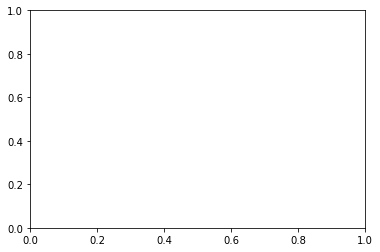

In [490]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy12 )

როგორც ჩანს მაჟორიტარულის შესახებ არ გვაქვს ინფორმაცია...

<AxesSubplot:xlabel='New', ylabel='n'>

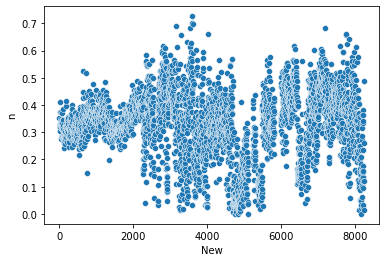

In [492]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy13 )

In [494]:
data2021_copy13.sort_values(by=['n'])


,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
4761,0.000000,4761,40,40 ახალქალაქი,40.38,0,mayor,0,0,120,...,0.0,NaN,NaN,NaN,88.0,NaN,NaN,124,73.387097,0.041019
5091,0.000000,5091,45,45 ცაგერი,45.36,0,mayor,0,3,23,...,0.0,NaN,1.0,NaN,21.0,NaN,NaN,29,75.862069,0.009593
8149,0.000000,8149,29,29 ყაზბეგი,29.11,1,mayor,1,0,0,...,0.0,0.0,0.0,NaN,10.0,NaN,NaN,14,85.714286,0.004631
4823,0.000000,4823,40,40 ახალქალაქი,40.69,0,mayor,0,0,694,...,0.0,NaN,NaN,NaN,354.0,NaN,NaN,703,54.196302,0.232550
4847,0.007752,4847,41,41 ნინოწმინდა,41.11,0,mayor,0,2,458,...,2.0,NaN,NaN,NaN,243.0,NaN,NaN,461,59.002169,0.152498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,0.684080,7185,67,67 ზუგდიდი,67.10,0,mayor,0,3,1181,...,275.0,NaN,21.0,NaN,102.0,NaN,NaN,1194,34.840871,0.394972
3142,0.690544,3142,21,21 გარდაბანი,21.27,0,mayor,0,0,1086,...,241.0,NaN,NaN,NaN,102.0,NaN,NaN,1096,34.124088,0.362554
3613,0.695906,3613,24,24 დმანისი,24.46,0,mayor,0,0,454,...,119.0,NaN,NaN,NaN,52.0,NaN,NaN,463,37.796976,0.153159
3597,0.702222,3597,24,24 დმანისი,24.38,0,mayor,0,0,475,...,158.0,NaN,NaN,NaN,67.0,NaN,NaN,479,50.104384,0.158452


In [496]:
k=p(data2021_copy13.sort_values(by=['n'])['n'])
k=pd.DataFrame(data=k)
k

,probability
4761,1.457574e-97
5091,1.457574e-97
8149,1.457574e-97
4823,1.457574e-97
4847,5.147014e-93
...,...
7185,4.114910e-111
3142,3.041313e-115
3613,9.991400e-119
3597,6.767637e-123


In [497]:
k.sort_values(by=['probability'])

,probability
3593,3.507636e-139
3597,6.767637e-123
3613,9.991400e-119
3142,3.041313e-115
7185,4.114910e-111
...,...
3468,2.563417e+01
876,2.563449e+01
7201,2.563599e+01
247,2.563653e+01


როგორც ვხედავთ 3593 უბანი კვლავ ანომალიის კანდიდატურად შესაძლოა მივიჩნიოთ თუმცა ესეც დმანისშია და როგორც ვნახეთ არ გვაქვს საკმარისი ინფორმაცია ამ უბანზე და ანალოგიურის თქმა შეიძლება როგორც წინა შემთხვევაში...

# CAND9

<AxesSubplot:xlabel='New', ylabel='n'>

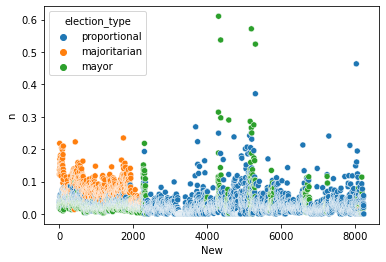

In [509]:
data2021_copy2.insert(0,'n',data2021_copy2['CAND9']/data2021_copy2['total_votes'])
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy2,hue='election_type' )

აქ კი შეიძლებ გამოიკვეთოს რამდენიმე ანომალია მონაცემების მიხედვით...

In [510]:
data2021_copy2.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
3255,0.000000,3255,22,22 მარნეული,22.19,0,proportional,0,0,722,...,170.0,0.0,0.0,0.0,124.0,0.0,0.0,724,42.955801,0.239497
3365,0.000000,3365,22,22 მარნეული,22.74,0,proportional,0,2,587,...,154.0,0.0,0.0,0.0,158.0,0.0,0.0,589,55.348048,0.194840
3367,0.000000,3367,22,22 მარნეული,22.75,0,proportional,0,0,496,...,112.0,0.0,14.0,0.0,111.0,0.0,0.0,503,52.683897,0.166391
3369,0.000000,3369,22,22 მარნეული,22.76,0,proportional,0,1,1189,...,138.0,0.0,0.0,0.0,415.0,0.0,0.0,1190,52.605042,0.393649
3371,0.000000,3371,22,22 მარნეული,22.77,0,proportional,0,0,1065,...,138.0,0.0,0.0,0.0,378.0,0.0,0.0,1075,51.441860,0.355607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8027,0.463291,8027,84,84 ხულო,84.32,0,proportional,0,0,661,...,78.0,183.0,15.0,0.0,110.0,2.0,0.0,663,61.840121,0.219319
5299,0.524194,5299,48,48 ხარაგაული,48.36,0,mayor,0,0,164,...,6.0,65.0,5.0,NaN,47.0,NaN,NaN,167,74.251497,0.055243
4359,0.536972,4359,33,33 ქარელი,33.36,0,mayor,0,0,1271,...,115.0,305.0,22.0,NaN,125.0,NaN,NaN,1281,45.589383,0.423751
5189,0.571429,5189,47,47 მესტია,47.21,0,mayor,0,0,112,...,NaN,52.0,2.0,NaN,32.0,NaN,1.0,123,74.796748,0.040688


In [512]:
data2021_copy21=data2021_copy2[data2021_copy2['election_type']=='proportional']
data2021_copy22=data2021_copy2[data2021_copy2['election_type']=='majoritarian']
data2021_copy23=data2021_copy2[data2021_copy2['election_type']=='mayor']

In [513]:
k=p(data2021_copy21.sort_values(by=['n'])['n'])
k=pd.DataFrame(data=k)
k

,probability
8229,9.306868e-293
3327,9.306868e-293
3329,9.306868e-293
3331,9.306868e-293
3333,9.306868e-293
...,...
4302,0.000000e+00
5188,0.000000e+00
3684,0.000000e+00
5298,0.000000e+00


<AxesSubplot:xlabel='New', ylabel='n'>

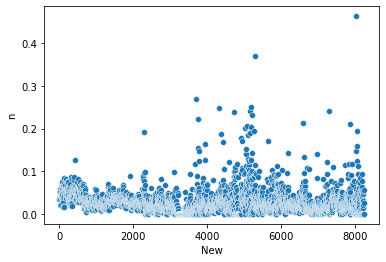

In [516]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy21 )

<AxesSubplot:xlabel='New', ylabel='n'>

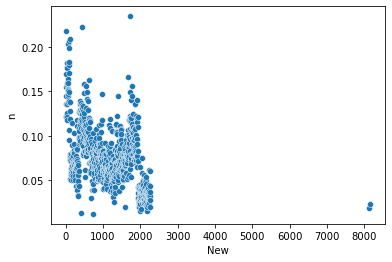

In [517]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy22 )

<AxesSubplot:xlabel='New', ylabel='n'>

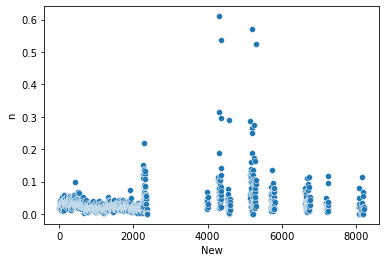

In [519]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy23 )

ვნახოთ პირველი და მესამე ცხრილის ზედა წერტილები და გადავამოწმოთ...

In [520]:
data2021_copy21.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8229,0.000000,8229,79,79 ბათუმი,79.105,0,proportional,1,0,0,...,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247
3327,0.000000,3327,22,22 მარნეული,22.550,0,proportional,0,0,1439,...,227.0,0.0,18.0,0.0,212.0,0.0,0.0,1445,34.394464,0.478002
3329,0.000000,3329,22,22 მარნეული,22.560,0,proportional,0,0,1308,...,100.0,0.0,0.0,0.0,470.0,0.0,0.0,1314,49.086758,0.434668
3331,0.000000,3331,22,22 მარნეული,22.570,0,proportional,0,0,954,...,172.0,0.0,0.0,0.0,166.0,0.0,0.0,959,45.985401,0.317235
3333,0.000000,3333,22,22 მარნეული,22.580,0,proportional,0,0,1414,...,203.0,0.0,5.0,0.0,114.0,0.0,0.0,1417,35.356387,0.468740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4302,0.249351,4302,33,33 ქარელი,33.060,0,proportional,0,0,690,...,124.0,96.0,29.0,0.0,110.0,2.0,0.0,701,56.633381,0.231889
5188,0.250000,5188,47,47 მესტია,47.210,0,proportional,0,0,112,...,6.0,22.0,6.0,0.0,43.0,0.0,0.0,123,74.796748,0.040688
3684,0.268817,3684,25,25 წალკა,25.320,0,proportional,0,0,568,...,38.0,75.0,47.0,0.0,81.0,0.0,0.0,568,50.528169,0.187893
5298,0.370968,5298,48,48 ხარაგაული,48.360,0,proportional,0,0,164,...,15.0,46.0,3.0,0.0,53.0,0.0,0.0,167,74.251497,0.055243


ბოლო ორი გადავამოწმოთ თუ მოვძებნეთ შესაბამისი მონაცემი წინა წლების მასალაში...

In [521]:
data2016_p[data2016_p['district_id']==84]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


In [525]:
data2018[data2018['district_id']==84]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
55,41.557470,42.432308,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ვერნების საარჩევნო უბანი,სასოფლო კლუბი,სოფ.ვერნები,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,2,3,5,29,3,0,102,56,4
65,41.666967,42.347354,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,დიდაჭარის საარჩევნო უბანი,საჯარო სკოლის შენობა,სოფ.დიდაჭარა 3 ქ. #9,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,14,3,12,71,5,3,184,173,4
88,41.677104,42.360233,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ირემაძეების საარჩევნო უბანი,საჯარო სკოლის შენობა,სოფ.ირემაძეები 1 ქ. #19,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,1,3,2,145,0,0,118,84,5
469,41.620206,42.293344,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჩაოს საარჩევნო უბანი,ადმინისტრაციული შენობა,სოფ.ჩაო,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,3,3,1,28,2,0,84,30,2
489,41.722324,42.348360,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჭახაურის საარჩევნო უბანი,ჭახაურის დაწყებითი სკოლა,სოფ.ჭახაური 1ქ. I შეს. # 2,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,3,3,0,8,0,0,156,28,0
511,41.636833,42.295955,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ვაშლოვანის საარჩევნო უბანი,საჯარო სკოლის შენობა,სოფ.ვაშლოვანი 1 ქ. 1 ჩიხი #6,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,14,3,16,111,7,0,310,230,5
649,41.627915,42.386617,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მანიაკეთის საარჩევნო უბანი,საჯარო სკოლა,სოფ.მანიაკეთი 2 ქ. #2,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,2,0,3,0,42,0,0,73,62,0
711,41.644877,42.280299,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ზედა ვაშლოვანის საარჩევნო უბანი,საჯარო სკოლის შენობა,სოფ.ზედა ვაშლოვანი 5 ქ. #3,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,14,3,10,53,3,0,240,137,5
767,41.583323,42.344892,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,წაბლანის საარჩევნო უბანი,წაბლანის საჯარო სკოლა,სოფ.წაბლანა,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,6,3,3,36,1,1,246,76,4
878,41.632903,42.389621,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,დიოკნისის საარჩევნო უბანი,საჯარო სკოლის შენობა,სოფ.დიოკნისი 3 ქ. #6,NaN,https://archiveresults.cec.gov.ge/results/2018...,84,...,3,3,3,4,21,6,0,97,84,4


In [526]:
data2020_p[data2020_p['district_id']==84]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


ის ლოკაცია არაა რაც ჩვენ გვაინტერესებდა(84.320 ის)

In [528]:
data2016_p[data2016_p['district_id']==48]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
3569,42.311653,42.708871,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#6 ბაგა-ბაღის შენობა,ავალიანის 18,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,31,3,10,13,21,20,194,202,15,16
3570,42.280481,42.713077,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#26 სკოლის შენობა,ლესელიძის 4,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,10,3,20,13,23,36,191,113,26,20
3571,42.279444,42.709135,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,ბოტანიკური ბაღის ადმ.შენობა,ლესელიძის 2,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,23,3,17,30,34,21,215,159,20,29
3572,42.277897,42.700715,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#6 სკოლის შენობა,ჩანჩიბაძის 12,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,40,2,21,21,39,19,278,152,22,21
3573,42.278018,42.700959,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#32 ბაგა-ბაღის შენობა,ჩანჩიბაძის 12,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,19,3,14,18,14,22,298,138,42,20
3574,42.271487,42.693678,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#20 სკოლის შენობა,ვაჟა-ფშაველას 13,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,28,3,18,24,31,26,306,141,33,28
3575,42.269871,42.692457,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#24 ბაგა-ბაღის შენობა,კიკვიძის მე-3 შეს. 2,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,9,3,8,29,36,17,222,202,25,38
3576,42.268454,42.698744,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,მწერალთა სახლის შენობა,გრიშაშვილის 4,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,18,3,20,17,24,38,325,166,29,31
3577,42.265133,42.697650,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#2 სკოლის შენობა,გ.ტაბიძის 58,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,22,3,26,28,30,35,357,169,32,35
3578,42.264042,42.697485,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#29 ბაგა-ბაღის შენობა,ჩეჩელაშვილის 24,NaN,https://archiveresults.cec.gov.ge/results/2016...,48,...,12,3,32,18,25,36,350,120,22,12


In [529]:
data2016_p[data2016_p['division_id']==48.360]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


In [530]:
data2020_p[data2020_p['district_id']==48]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [531]:
data2018[data2018['district_id']==48]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
25,42.000851,43.441057,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,წიფის,საჯარო სკოლა,სოფ. წიფა,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,4,3,14,42,9,2,202,95,15
39,42.105283,43.310938,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,საქასრიის,ვაშლევის საჯარო სკოლა,სოფ. ვაშლევი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,5,3,4,10,0,0,156,83,7
101,42.010319,43.117492,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ხიდრის,ხიდრის ტერიტ. ერთეულის ადმინ. შენობა,სოფ. ხიდარი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,6,3,10,61,7,0,162,153,8
149,42.035733,43.119024,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,კიცხის,სასოფლო კლუბი,სოფ. კიცხი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,13,3,23,74,11,2,211,222,14
165,42.109372,43.267927,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ბორითის,კულტურის სახლი,სოფ. ბორითი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,5,3,13,49,7,0,221,194,6
187,41.964532,43.332996,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქვების,ყოფილი დაწყებითი სკოლის შენობა,სოფ. ქვები,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,6,3,7,23,0,0,97,53,6
317,42.016309,43.218482,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჩხერის,კერძო ბინა,სოფ. ჩხერი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,3,3,2,13,0,0,91,84,6
448,42.109136,43.330132,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ვერტყვიჭალის,სასოფლო კლუბი,სოფ. ვერტყვიჭალა,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,8,2,9,40,5,1,208,130,7
620,42.011231,43.208606,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,დაბა ხარაგაულის,ხარაგაულის რაიონის კულტურის ცენტრი,მის: სოლომონ მეფის ქ. №4,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,19,3,9,41,36,21,310,201,26
709,42.118778,43.241747,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მაქათუბნის,კერძო ბინა,სოფ. მაქათუბანი,NaN,https://archiveresults.cec.gov.ge/results/2018...,48,...,3,1,3,2,16,1,0,117,50,2


ხარაგაულის რაიონი კი არის თუმცა პარტია არ არის მონაცემებში, შესაბამისად ამ მონაცემებზეც ვერაფერს ვიტყვით...

In [533]:
data2021_copy23.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
5197,0.000000,5197,47,47 მესტია,47.25,0,mayor,0,0,113,...,NaN,0.0,7.0,NaN,53.0,NaN,0.0,116,55.172414,0.038372
4571,0.000000,4571,37,37 ახალციხე,37.19,0,mayor,0,3,431,...,19.0,0.0,0.0,NaN,247.0,NaN,NaN,436,61.926606,0.144228
2364,0.000000,2364,11,11 საგარეჯო,11.50,0,mayor,0,0,1064,...,115.0,0.0,NaN,NaN,162.0,NaN,NaN,1074,28.398510,0.355276
8096,0.000000,8096,4,4 კრწანისი,4.33,1,mayor,1,0,0,...,12.0,0.0,4.0,NaN,31.0,NaN,1.0,91,53.846154,0.030103
8098,0.000000,8098,1,1 მთაწმინდა,1.42,1,mayor,1,0,0,...,8.0,0.0,7.0,NaN,21.0,NaN,4.0,45,91.111111,0.014886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,0.314159,4299,33,33 ქარელი,33.04,0,mayor,0,0,1086,...,134.0,142.0,23.0,NaN,152.0,NaN,NaN,1099,43.676069,0.363546
5299,0.524194,5299,48,48 ხარაგაული,48.36,0,mayor,0,0,164,...,6.0,65.0,5.0,NaN,47.0,NaN,NaN,167,74.251497,0.055243
4359,0.536972,4359,33,33 ქარელი,33.36,0,mayor,0,0,1271,...,115.0,305.0,22.0,NaN,125.0,NaN,NaN,1281,45.589383,0.423751
5189,0.571429,5189,47,47 მესტია,47.21,0,mayor,0,0,112,...,NaN,52.0,2.0,NaN,32.0,NaN,1.0,123,74.796748,0.040688


ბოლო ხუთი შეგვიძლია განვიხილოთ როგორც ანომალია თუმცა წინა წლებში ამ პარტიის შესახებ არაა ცნობები ამიტომ ძნელია თქმა ანომალიაა თუ არა, სრულიად შესაძლებელია ახალი პარტია იყოს და ამ ბოლო კონკრეტულ ლოკაციებზე ამ პარტიის ბევრი მხარდამჭერი ცხოვრობდეს უბრალოდ...

განვიხილოთ 25, 41 და 48 კანდიდატურები რადგან დანარჩენებზე არ გვაქვს ინფორმაცია, როგორც უკვე წავაწყდით მე-9 კანდიდატის შემთხვევაში, ვფიქრობდი სათითაოდ განვიხილავდი როგორც მე-5 კანდიდატურის შემთხვევაში თუმცა მონაცემების გარეშე ანომალიად მიჩნევა არასწორი იქნება...

# CAND25

<AxesSubplot:xlabel='New', ylabel='n'>

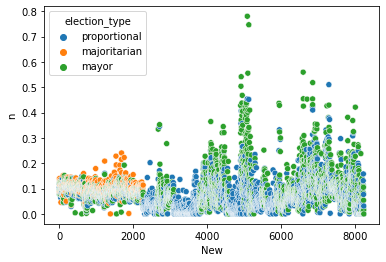

In [534]:
data2021_copy3.insert(0,'n',data2021_copy3['CAND25']/data2021_copy3['total_votes'])
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy3,hue='election_type' )

In [538]:
data2021_copy3.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8230,0.000000,8230,79,79 ბათუმი,79.105,0,mayor,1,0,0,...,4.0,NaN,0.0,NaN,29.0,0.0,NaN,34,97.058824,0.011247
2910,0.000000,2910,19,19 თიანეთი,19.140,0,mayor,0,2,339,...,26.0,NaN,0.0,NaN,100.0,NaN,NaN,339,66.666667,0.112140
4520,0.000000,4520,36,36 ბორჯომი,36.240,0,proportional,0,0,183,...,6.0,1.0,0.0,0.0,62.0,0.0,0.0,185,45.405405,0.061197
4570,0.000000,4570,37,37 ახალციხე,37.190,0,proportional,0,3,431,...,17.0,0.0,0.0,0.0,246.0,0.0,0.0,436,61.926606,0.144228
4571,0.000000,4571,37,37 ახალციხე,37.190,0,mayor,0,3,431,...,19.0,0.0,0.0,NaN,247.0,NaN,NaN,436,61.926606,0.144228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.541667,4915,43,43 ონი,43.080,0,mayor,0,0,173,...,15.0,NaN,65.0,NaN,40.0,NaN,NaN,181,71.270718,0.059874
5095,0.555556,5095,45,45 ცაგერი,45.380,0,mayor,0,0,77,...,2.0,NaN,30.0,NaN,22.0,NaN,NaN,80,70.000000,0.026464
6591,0.559557,6591,61,61 ლანჩხუთი,61.170,0,mayor,0,2,551,...,NaN,NaN,202.0,NaN,148.0,NaN,NaN,556,66.546763,0.183923
5121,0.746667,5121,46,46 ლენტეხი,46.100,0,mayor,0,0,107,...,NaN,NaN,56.0,NaN,19.0,NaN,NaN,111,67.567568,0.036718


In [542]:
data2021_copy31=data2021_copy3[data2021_copy3['election_type']=='proportional']
data2021_copy32=data2021_copy3[data2021_copy3['election_type']=='majoritarian']
data2021_copy33=data2021_copy3[data2021_copy3['election_type']=='mayor']

<AxesSubplot:xlabel='New', ylabel='n'>

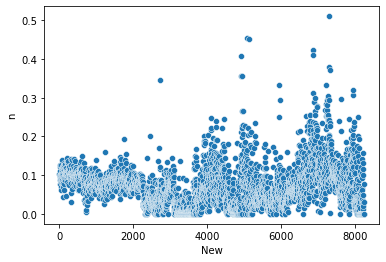

In [543]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy31)

<AxesSubplot:xlabel='New', ylabel='n'>

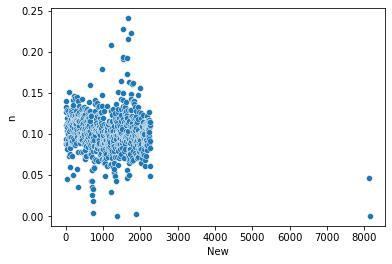

In [544]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy32)

<AxesSubplot:xlabel='New', ylabel='n'>

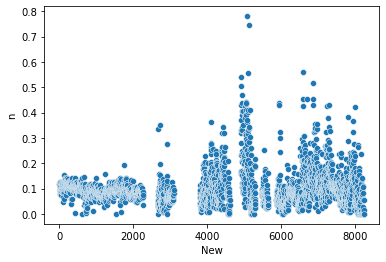

In [545]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy33)

ვნახოთ პროპორციულის ...

In [549]:
k=p(data2021_copy31.sort_values(by=['n'])['n'])
k=pd.DataFrame(data=k)
k

,probability
8227,1.794071e-129
3792,1.794071e-129
3111,1.794071e-129
4520,1.794071e-129
4570,1.794071e-129
...,...
6848,0.000000e+00
6844,0.000000e+00
5120,0.000000e+00
5080,0.000000e+00


In [550]:
data2021_copy31.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8227,0.000000,8227,58,58 წყალტუბო,58.68,0,proportional,1,0,0,...,0.0,0.0,0.0,0.0,61.0,1.0,0.0,68,98.529412,0.022494
3792,0.000000,3792,26,26 თეთრიწყარო,26.42,0,proportional,0,0,72,...,2.0,2.0,0.0,0.0,35.0,0.0,0.0,72,63.888889,0.023817
3111,0.000000,3111,21,21 გარდაბანი,21.12,0,proportional,0,2,672,...,63.0,0.0,0.0,0.0,106.0,0.0,0.0,684,26.023392,0.226265
4520,0.000000,4520,36,36 ბორჯომი,36.24,0,proportional,0,0,183,...,6.0,1.0,0.0,0.0,62.0,0.0,0.0,185,45.405405,0.061197
4570,0.000000,4570,37,37 ახალციხე,37.19,0,proportional,0,3,431,...,17.0,0.0,0.0,0.0,246.0,0.0,0.0,436,61.926606,0.144228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,0.410000,6848,65,65 მარტვილი,65.03,0,proportional,0,2,466,...,57.0,0.0,123.0,0.0,87.0,0.0,0.0,468,66.025641,0.154813
6844,0.424023,6844,65,65 მარტვილი,65.01,0,proportional,0,1,1089,...,126.0,7.0,293.0,0.0,183.0,0.0,0.0,1100,65.272727,0.363877
5120,0.452055,5120,46,46 ლენტეხი,46.10,0,proportional,0,0,107,...,3.0,1.0,33.0,0.0,16.0,0.0,0.0,111,67.567568,0.036718
5080,0.453846,5080,45,45 ცაგერი,45.31,0,proportional,0,0,637,...,53.0,17.0,177.0,0.0,126.0,0.0,0.0,639,62.910798,0.211379


ნახევარზე მეტი აქვს აღებული, ვნახოთ წინა წლებში...

In [555]:
data2016_p[data2016_p['district_id']==69]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
2938,41.649851,41.642508,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,მუსიკალური სასწავლებელი,გორგასლის #4,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,12,3,20,18,24,25,283,153,39,39
2939,41.650949,41.638257,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,სავაჭრო პალატის შენობა,ა მელაშვილის #26,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,16,3,18,13,16,25,276,197,38,41
2940,41.648179,41.640249,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,მოსწავლე-ახალგაზრდობის სასახლე,კოსტანტინე გამსახურდიას ქ. 37,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,100,2,14,10,28,52,258,181,31,38
2941,41.646424,41.631763,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#2 საჯარო სკოლა,ხ. ახვლედიანის (ყოფ ი ჯინჭარაძის ქ.) #19,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,28,3,12,17,31,43,405,147,54,39
2942,41.648973,41.632986,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,საჯარო ბიბლიოთეკა,ვაჟა-ფშაველას #21,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,17,3,18,14,27,29,288,137,55,36
2943,41.647827,41.633251,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,პედაგოგიური კოლეჯი,ზურაბ გორგილაძის ქ. #19.,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,13,3,16,9,34,38,286,145,27,40
2944,41.647051,41.637685,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#1 საჯარო სკოლა,დ. თავდადებულის ქ. #47,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,23,3,27,17,41,43,287,117,45,52
2945,41.644195,41.627693,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#3 საჯარო სკოლა,ვახტანგ გორგასლის ქ. #122,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,19,3,23,15,33,52,361,213,69,41
2946,41.641980,41.624309,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,#8 საჯარო სკოლა,გრიბოედოვის ქ. #35,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,21,3,17,17,33,55,276,181,61,26
2947,41.643557,41.630324,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ქ. ბათუმის,"#7 საჯარო სკოლა,",ჰ. აბაშიძის ქ. #30,NaN,https://archiveresults.cec.gov.ge/results/2016...,69,...,23,3,26,14,31,44,357,169,52,40


In [556]:
data2020_p[data2020_p['district_id']==69]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [557]:
data2018[data2018['district_id']==69]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
292,42.438451,42.094046,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ლესიჭინეს პირველი,ლესიჭინეს მეორე საჯარო სკოლა,ს. ლესიჭინეს 35-ე ქ. #31,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,11,3,18,64,6,4,191,312,17
587,42.442996,42.099481,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ლესიჭინეს მეორე,ლესიჭინეს პირველი საჯარო სკოლა,ს. ლესიჭინეს 1-ლი ქ. #1,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,20,3,18,44,4,1,163,228,17
658,42.491447,42.109657,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქვედაჩხოროწყუს,ქვედაჩხოროწყუს საჯარო სკოლა,ს.ქვედაჩხოროწყუს 1-ლი ქ.#2,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,15,6,15,67,7,3,214,357,21
729,42.478101,42.048052,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,კირცხის,#1 საბავშვო ბაღი,ს. კირცხის 22-ე ქ.#13,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,8,3,11,22,3,0,218,273,9
1089,42.480695,42.138029,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,მონგირის,ახუთის #2 საჯარო სკოლის შენობა,ს. ახუთის მე-18 ქ.#22,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,2,3,4,33,1,2,125,139,8
1310,42.573606,42.134580,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჯუმითის,ჯუმითის ბაგა-ბაღი,ს.ხაბუმის 46-ე ქ.12,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,9,3,6,6,0,0,128,93,7
1384,42.621013,42.175741,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ლეგახარეს,ლეგახარეს ბაგა-ბაღი,მუხურის მე-17 ქ.117,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,8,3,1,16,0,2,116,150,13
1507,42.564768,42.194999,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,პირველი ჭოღის,ჭოღის საჯარო სკოლა,ს.ჭოღის მე-16 ქ. #1,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,17,3,6,36,3,1,124,225,26
1609,42.518357,42.126359,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,დაბა ჩხოროწყუს,სასტუმრო ჩხორია,დ.ჩხოროწყუ აღმაშენებლის ქ. #15,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,17,3,12,36,13,1,167,225,21
1647,42.524776,42.128507,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,02 დაბა ჩხოროწყუს,ჩხოროწყუს პირველი საჯარო სკოლა,დ. ჩხოროწყუ ი.ჭავჭავაძის ქ.32,NaN,https://archiveresults.cec.gov.ge/results/2018...,69,...,3,2,2,7,44,7,2,264,294,20


მხოლოდ საპრეზდიტენტო არჩევნებში ვხვდებით მსგავს ლოკაციას და შესაბამისად როგორც წინა შემთხვევებში ძნელია თქმა ანომალია არის თუ არა ასე ცალსახად ერთი წლის მონაცემით...

# CAND41

<AxesSubplot:xlabel='New', ylabel='n'>

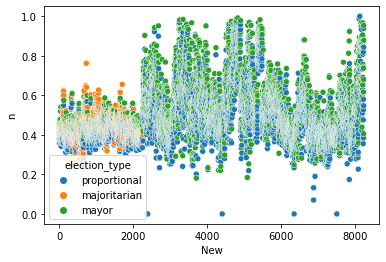

In [535]:
data2021_copy5.insert(0,'n',data2021_copy5['CAND41']/data2021_copy5['total_votes'])
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy5,hue='election_type' )

In [537]:
data2021_copy5.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
4402,0.000000,4402,35,35 ხაშური,35.17,0,proportional,0,1,1168,...,223.0,10.0,89.0,0.0,0.0,4.0,0.0,1181,48.856901,0.390672
6346,0.000000,6346,59,59 ქუთაისი,59.82,0,proportional,0,0,1128,...,242.0,7.0,31.0,0.0,0.0,12.0,6.0,1138,44.463972,0.376447
2357,0.000000,2357,11,11 საგარეჯო,11.47,0,proportional,0,0,1519,...,252.0,4.0,1.0,0.0,0.0,2.0,0.0,1530,34.575163,0.506120
7500,0.000000,7500,79,79 ბათუმი,79.63,0,proportional,0,0,1468,...,221.0,26.0,60.0,7.0,0.0,13.0,0.0,1481,50.844024,0.489911
2385,0.000000,2385,12,12 გურჯაანი,12.11,0,proportional,0,0,1441,...,215.0,19.0,41.0,0.0,0.0,4.0,0.0,1446,44.190871,0.478333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,0.983740,3344,22,22 მარნეული,22.63,0,mayor,0,0,162,...,2.0,NaN,NaN,NaN,121.0,NaN,NaN,183,74.863388,0.060536
4783,0.986166,4783,40,40 ახალქალაქი,40.49,0,mayor,0,0,820,...,7.0,NaN,NaN,NaN,499.0,NaN,NaN,827,62.515115,0.273569
8104,0.986667,8104,20,20 რუსთავი,20.86,0,mayor,0,0,0,...,1.0,NaN,0.0,NaN,74.0,NaN,NaN,101,93.069307,0.033411
4823,0.991597,4823,40,40 ახალქალაქი,40.69,0,mayor,0,0,694,...,0.0,NaN,NaN,NaN,354.0,NaN,NaN,703,54.196302,0.232550


In [540]:
data2021_copy51=data2021_copy5[data2021_copy5['election_type']=='proportional']
data2021_copy52=data2021_copy5[data2021_copy5['election_type']=='majoritarian']
data2021_copy53=data2021_copy5[data2021_copy5['election_type']=='mayor']

ცხრილში უკვე ვხედავთ რომ ერთ-ერთ უბანზე ხმების მაქსიმალური რაოდენობაა აქვს აღებული 41-ე კანდიდატს რაც ინტუიციურად თითქოს ანომალიის შთაბეჭდილებას ტოვებს და გადავამოწმოთ... 

<AxesSubplot:xlabel='New', ylabel='n'>

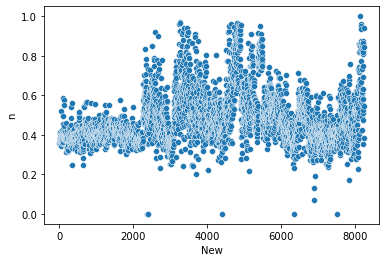

In [558]:
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy51 )

In [559]:
data2016_p[data2016_p['district_id']==21]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
2040,41.797650,44.820736,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#216 ბაგა-ბაღი,გლდანის მე-4 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,18,3,11,24,47,19,205,145,37,30
2041,41.801291,44.820536,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#216 ბაგა-ბაღი,გლდანის მე-4 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,25,3,15,24,38,25,229,137,45,31
2042,41.801612,44.820630,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#216 ბაგა-ბაღი,გლდანის მე-4 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,8,3,24,25,40,41,268,150,44,26
2043,41.801093,44.820635,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#216 ბაგა-ბაღი,გლდანის მე-4 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,22,3,16,23,57,24,244,138,30,23
2044,41.803493,44.814522,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#200 საჯარო სკოლა,ქერჩის #22,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,23,3,23,39,39,25,325,141,70,41
2045,41.797022,44.811708,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#160 საჯარო სკოლა,გლდანის მე-2 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,3,2,15,22,41,7,219,183,24,24
2046,41.802821,44.823400,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#107-ე ბაგა-ბაღი,გლდანის მე-6 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,25,3,18,28,31,23,249,127,24,34
2047,41.803337,44.823286,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#107-ე ბაგა-ბაღი,გლდანის მე-6 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,26,3,16,23,27,28,237,139,40,22
2048,41.802878,44.825684,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,საბავშვო ბიბლიოთეკა,გლდანის მე-6 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,16,3,8,15,31,21,229,167,25,20
2049,41.805967,44.822110,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#132 საჯარო სკოლა,გლდანის მე-6 მ/რ,NaN,https://archiveresults.cec.gov.ge/results/2016...,21,...,21,3,27,35,29,28,269,195,32,41


გლდანში მართალია უპირატესობა აქვს 41-ე კანდიდატურას თუმცა 100% არსად არაა, არც თუ ისე ახლოსაა 100% თან

In [560]:
data2020_p[data2020_p['district_id']==21]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
1515,42.183665,42.976677,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N49.01 თერჯოლის საარჩევნო უბანი,N1 საჯარო სკოლა,ქ. თერჯოლა. რუსთაველის ქ. N113,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,18,3,93,11,6,298,156,10,11,52
1516,42.186456,42.977727,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N49.02 თერჯოლის საარჩევნო უბანი,N2 საბავშვო ბაღი,ქ. თერჯოლა რუსთაველის ქ. N129,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,19,3,104,21,17,365,184,18,7,49
1517,42.177627,42.972664,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N49.03 თერჯოლის საარჩევნო უბანი,N2 საჯარო სკოლა,ქ. თერჯოლა. ოთხი ძმის ქ. N17,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,26,3,193,23,10,355,129,14,20,59
1518,42.256872,43.020111,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N49.04 ზედა ალისუბნის საარჩევნო უბანი,საბავშვო ბაღი,სოფ.ზედა ალისუბანი,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,23,3,187,9,2,312,125,8,9,37
1519,42.229613,43.030680,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,N49.05 ქვ. ალისუბნის საარჩევნო უბანი,N1 საჯარო სკოლა,სოფ.ქვედა ალისუბანი,NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,17,3,261,11,7,299,92,33,15,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,42.346967,42.997614,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,კინოთეატრ შაორის მეორე საარჩევნო უბანი,კინოთეატრი შაორი,"ტყიბული, გამსახურდიას ქ. #44",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,8,3,7,6,6,123,63,7,6,21
1666,42.349379,43.011123,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,წულუკიძის სახელობის შახტის საარჩევნო უბანი,საცხოვრებელი სახლის I სართული,"ტყიბული, ბრეგვაძის ქ №2",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,10,3,27,10,9,188,135,11,9,37
1667,42.342824,42.994507,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ძველი ტყიბულის მესამე საარჩევნო უბანი,ტყიბულის № 1 საჯარო სკოლის შენობა,"ტყიბული, ვაჟა-ფშაველას ქ №1",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,10,3,35,8,10,219,137,18,14,49
1668,42.325044,42.812618,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ორპირის მეორე საარჩევნო უბანი,ორპირის საჯარო სკოლის შენობა,"ტყიბული, სოფ. ორპირი 1 ქ № 14",NaN,https://archiveresults.cec.gov.ge/results/2020...,21,...,11,3,16,13,1,161,113,6,22,25


ზევით ცხრილში ასეთი ლოკაცია არააა...ასევე ის ფაქტიც უნდა გავითვალისწინოთ რომ სულ 5 ხმაა დაფიქსირებული და თანაც კოვიდ ცენტრია, ასე რომ ანომალიად მიჩნევა ვფიქრობ არასწორი იქნება, თანაც თუ სქემასაც დავუჯერებთ საკმაოდ მაღალი პროცენტული მაჩვენებლები აქვს 41-ე კანდიდატს ...

ვნახოთ ახლა ის ლოკაციები სადაც 0-ია რადგან საკმაოდ საეჭვოა გრაფიკიდანაც ასეთი დაბალი მაჩვენებელი...

In [571]:
data2020_p[data2020_p['district_id']==35]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [572]:
data2020_p[data2020_p['district_id']==59]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [573]:
data2020_p[data2020_p['district_id']==11]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
3038,42.119446,44.968294,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,თიანეთი,#2 საჯარო სკოლა,ლაშარის ქ #67,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,13,3,6,10,13,176,144,17,18,177
3039,42.103483,44.968172,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,თიანეთი,#1 საჯარო სკოლა,რუსთაველის ქ #59,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,42,3,15,5,12,265,94,22,15,166
3040,41.988537,45.022148,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,სიონი,საჯარო სკოლა,დაბა სიონი,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,6,3,9,3,6,128,59,0,12,53
3041,41.961495,45.034405,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ორხევი,კერძო ბინა,ორხევი,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,4,3,1,4,2,93,29,4,9,20
3042,41.913594,45.121415,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ბოჭორმა,საბაზო სკოლა,ბოჭორმა,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,4,3,8,2,1,66,59,4,5,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161,42.590673,44.524884,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,ს.ყანობის საჯარო სკოლა,ს.ყანობი,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,1,3,4,1,0,88,17,1,4,4
3162,42.560233,44.511213,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,კობის საკრებულოს შენობა,ს.კობი,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,4,3,1,0,0,68,13,3,4,11
3163,42.463611,44.478611,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,ს.გუდაურის საჯარო სკოლა,ს.გუდაური,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,3,3,3,2,4,114,8,3,5,13
3164,NaN,NaN,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,NaN,NaN,NaN,https://archiveresults.cec.gov.ge/results/2020...,11,...,1,3,1,0,0,20,1,0,1,0


In [574]:
data2020_p[data2020_p['district_id']==79]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [575]:
data2020_p[data2020_p['district_id']==12]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other
2290,41.541145,45.009679,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,ქ. რუსთავის მუნიციპალური თეატრი,ნ. ფიროსმანის ქ. 7,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,31,3,13,22,48,278,136,28,22,55
2291,41.543153,45.006745,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N2 საჯარო სკოლა,გ. ნიკოლაძის ქ. 6,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,21,3,10,21,42,322,117,25,19,64
2292,41.537046,45.013851,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N1 საჯარო სკოლა,ნ. ფიროსმანის ქ. 18,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,31,3,12,31,25,291,225,26,19,59
2293,41.539647,45.016420,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,შპს „რვალი”,ბოსტან-ქალაქის ქ. 3,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,26,3,24,44,49,314,265,28,42,83
2294,41.545462,45.010219,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,NaN,N1 საბავშვო ბაღი,კონსტიტუციის ქ. 5ა,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,15,3,14,14,38,233,102,29,25,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,41.741194,45.154238,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,მუღანლოს,მუღანლოს საჯარო სკოლის შენობა,სოფ. მუღანლო,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,25,3,11,0,1,221,309,1,3,3
2408,41.715658,45.183836,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,სართიჭალის,N2 საჯარო სკოლის I კორპუსი,სოფ. სართიჭალა,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,25,3,13,31,10,382,166,6,27,61
2409,41.618266,44.782650,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,კუმისის,ბაგა-ბაღის შენობა,სოფ. კუმისი,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,30,3,26,23,13,663,179,15,26,47
2410,41.662321,45.079860,2020,2020 წლის 31 ოქტომბრის საქართველოს პარლამენტის...,ვაზიანის,N2 საჯარო სკოლის შენობა,სოფ. ვაზიანი,NaN,https://archiveresults.cec.gov.ge/results/2020...,12,...,22,3,6,24,10,384,159,14,12,52


In [576]:
data2016_p[data2016_p['district_id']==35]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
442,41.442019,44.894160,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ალგეთის,კულტურის სახლი,სოფ. ალგეთი.,NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,34,4,29,1,1,5,207,285,9,22
443,41.452586,44.862950,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,საბირკენტი,საჯარო სკოლა,"სოფ. საბირკენდი,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,8,4,5,0,0,0,399,322,0,8
444,41.458543,44.849851,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,საბირკენტი,ყოფილი სკოლის შენობა,"სოფ საბირკენდი,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,26,4,72,1,3,2,205,222,2,16
445,41.437232,44.912883,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,თაზაკენდი,საჯარო სკოლა,სოფ. თაზაკენდი,NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,20,4,3,1,6,1,329,290,17,10
446,41.421519,44.943729,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,აზიზკენდი,საჯარო სკოლა,"სოფ. აზიზკენდი,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,22,2,3,0,1,4,305,92,3,5
447,41.307565,44.864797,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,კასუმლო,კლუბის შენობა,სოფ. კასუმლო,NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,18,3,18,0,0,20,278,96,2,44
448,41.327973,44.909240,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,აღმამედლო,კულტურის სახლი,"სოფ. აღმამედლო,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,26,4,2,1,1,4,207,142,7,30
449,41.299341,44.843218,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ბეითარაფჩი,საჯარო სკოლა,"სოფ. ბეითარაბჩი,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,17,5,4,0,1,1,185,192,1,22
450,41.319467,44.883356,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ულაშლო,საჯარო სკოლა,"სოფ. ულაშლო,",NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,16,5,2,0,3,2,209,265,0,8
451,41.245087,44.798770,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სადახლო,N1საჯარო სკოლა,სოფ. სადახლო 1 ქუჩა#8,NaN,https://archiveresults.cec.gov.ge/results/2016...,35,...,21,5,0,0,8,2,336,258,5,5


In [577]:
data2016_p[data2016_p['district_id']==59]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
342,41.931379,41.993481,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ზვანი 1,№3 საჯარო სკოლა,ოზურგეთი ბათუმის ქ № 87,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,10,2,34,39,46,47,450,82,53,19
343,41.927224,41.999476,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ზვანი 2,სპორტის სასახლე,ოზურგეთი კოსტავას ქ №3,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,17,3,54,15,22,27,375,90,41,13
344,41.923921,41.991080,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,რ/ც საავადმყოფო,საბავშვო ბაღი,ნ. ნიკოლაძის N55,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,12,3,34,17,31,30,363,82,42,19
345,41.926075,41.998997,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,მოიდანახე 1,№4 საჯარო სკოლა,ოზურგეთი გოგებაშვილის №3,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,23,3,45,14,59,43,438,88,48,18
346,41.923829,42.005950,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,მოიდანახე 2,პროფესიული კოლეჯი ”ჰორიზონტი”,რუსთაველის ქუჩა №8,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,17,3,34,8,41,17,316,87,23,19
347,41.923783,42.004347,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ცენტრი 1,კინოთეატრის შენობა,ოზურგეთი რუსთაველის ქ. № 2,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,17,2,28,14,41,49,495,98,33,17
348,41.923281,42.006325,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ცენტრი 2,თეატრის შენობა,ოზურგეთი ჭავჭავაძის ქ. № 1,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,12,3,41,14,53,32,441,116,30,11
349,41.919576,42.004811,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,სერი,№1 საჯარო სკოლა,ოზურგეთი ნინოშვილის ქ. №5,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,30,3,30,20,49,36,516,110,47,27
350,41.923853,42.020490,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ლაშე 1,სამაუწყებლო კომპანია გურია,დ. აღმაშენებლის ქ № 120,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,18,3,29,22,36,34,356,87,28,15
351,41.909216,42.002374,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,ექადია,18 საგზაო სამმართველოს შენობა,ე.თაყაიშვილის ქ №61,NaN,https://archiveresults.cec.gov.ge/results/2016...,59,...,14,2,32,8,41,26,247,56,32,9


In [578]:
data2016_p[data2016_p['district_id']==11]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
3065,41.708953,44.877408,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#3 მუსიკალური სკოლა,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,21,3,30,22,29,43,239,138,36,35
3066,41.709196,44.879942,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#196-ე საბავშვო ბაღი,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,22,3,39,24,24,28,229,119,39,24
3067,41.709213,44.879949,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#196-ე საბავშვო ბაღი,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,22,3,74,26,36,22,240,176,34,18
3068,41.708953,44.877282,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#3 მუსიკალური სკოლა,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,15,3,33,14,33,21,182,93,31,19
3069,41.709459,44.880001,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#196-ე საბავშვო ბაღი,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,18,2,41,23,40,29,208,120,33,22
3070,41.709463,44.879975,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#196-ე საბავშვო ბაღი,"ვარკეთილი 3, IV მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,32,3,18,28,24,24,216,177,33,19
3071,41.706839,44.879737,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#180 საჯარო სკოლა,"ვარკეთილი 3, III ა მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,19,3,17,26,25,18,211,83,34,22
3072,41.706798,44.879728,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#180 საჯარო სკოლა,"ვარკეთილი 3, III ა მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,23,3,59,16,43,27,243,135,50,18
3073,41.706521,44.879683,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#180-ე საჯარო სკოლა,"ვარკეთილი 3 IIIა მ/რ,",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,18,3,34,22,44,21,271,106,39,26
3074,41.703494,44.875084,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#179-ე საჯარო სკოლა,"ვარკეთილი 3, III მ/რ",NaN,https://archiveresults.cec.gov.ge/results/2016...,11,...,12,3,17,27,39,23,226,120,31,20


In [581]:
data2016_p[data2016_p['district_id']==79]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other


In [580]:
data2016_p[data2016_p['district_id']==12]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
2536,41.692299,44.875883,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#146 საჯარო სკოლა,აეროდრომის დასახლება მე-14 ქუჩა,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,13,3,10,13,21,12,201,83,27,21
2537,41.695022,44.872260,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#145-ე საჯარო სკოლა,ჯავახეთის 11ა,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,22,3,8,19,31,33,152,103,40,14
2538,41.692490,44.876186,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#146-ე საჯარო სკოლა,აეროდრომის დასახლება მე-14 ქუჩა,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,13,3,16,30,27,25,291,130,26,26
2539,41.692217,44.878414,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#115-ე ბაგა-ბაღი,მე-3 მასივის ზემო პლატო,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,15,3,14,20,26,33,202,126,18,23
2540,41.693221,44.880891,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#152-ე საჯარო სკოლა,მესამე მასივის ზემო პლატო,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,7,3,9,16,36,16,207,142,30,43
2541,41.692543,44.878668,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#115-ე ბაგა-ბაღი,მე-3 მასივის ზემო პლატო,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,24,3,9,24,25,21,206,95,9,20
2542,41.692668,44.878620,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#115-ე ბაგა-ბაღი,მე-3 მასივის ზემო პლატო,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,20,2,14,31,28,28,221,152,39,40
2543,41.691303,44.878111,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,გაზის მეურნეობის საექს. სამმართველო,თრიალეთის ქ. 36,NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,25,3,21,25,39,22,244,144,35,27
2544,41.689425,44.875086,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,"შპს\""მედისონი\""(სკ.ლიც.ლამპარი)",კალოუბნის 12(კალოუბანი 10),NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,13,3,21,32,38,22,217,149,34,23
2545,41.686638,44.878635,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#117-ე საჯარო სკოლა,"მე-3 მასივი, თრიალეთის ქ. #7",NaN,https://archiveresults.cec.gov.ge/results/2016...,12,...,21,3,17,21,42,24,259,137,24,19


In [582]:
data2021_copy51.sort_values(by=['n'])[data2021_copy51['n']==0]

<ipython-input-582-27e0bfb289fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2021_copy51.sort_values(by=['n'])[data2021_copy51['n']==0]


,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
4402,0.0,4402,35,35 ხაშური,35.17,0,proportional,0,1,1168,...,223.0,10.0,89.0,0.0,0.0,4.0,0.0,1181,48.856901,0.390672
6346,0.0,6346,59,59 ქუთაისი,59.82,0,proportional,0,0,1128,...,242.0,7.0,31.0,0.0,0.0,12.0,6.0,1138,44.463972,0.376447
2387,0.0,2387,12,12 გურჯაანი,12.12,0,proportional,0,3,866,...,178.0,18.0,18.0,0.0,0.0,3.0,0.0,870,68.160920,0.287794
7500,0.0,7500,79,79 ბათუმი,79.63,0,proportional,0,0,1468,...,221.0,26.0,60.0,7.0,0.0,13.0,0.0,1481,50.844024,0.489911
2357,0.0,2357,11,11 საგარეჯო,11.47,0,proportional,0,0,1519,...,252.0,4.0,1.0,0.0,0.0,2.0,0.0,1530,34.575163,0.506120
2385,0.0,2385,12,12 გურჯაანი,12.11,0,proportional,0,0,1441,...,215.0,19.0,41.0,0.0,0.0,4.0,0.0,1446,44.190871,0.478333


როგორც ვხედავთ ამ ლოკაციებზე 41-ე პარტიას აქვს აღებული ყველგან 0 ხმა რაც ცოტა საეჭვოა, თუმცა დანამდვილებით არც იმის თქმა  შეიძლება რომ ანომალიაა რადგან  district_idების მიხედვით არ მოიძებნა ზუსტად შესაბამისი ლოკაციები , მაგრამ ფაქტია რაც დააბრუნა ყველგან 41-ე პარტიის პროცენტული მაჩვენებელი საკმაოდ მაღალი იყო...

# CAND48

<AxesSubplot:xlabel='New', ylabel='n'>

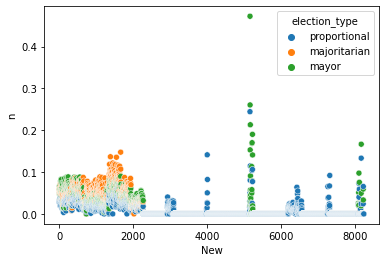

In [585]:
data2021_copy7.insert(0,'n',data2021_copy7['CAND48']/data2021_copy7['total_votes'])
sns.scatterplot(x='New', y ='n' ,
data = data2021_copy7,hue='election_type' )

In [586]:
data2021_copy7.sort_values(by=['n'])

,n,New,district_id,district_alt_id,division_id,division_is_covid,election_type,covid_station,global_sample,total_registered_voters,...,CAND5,CAND9,CAND25,CAND32,CAND41,CAND45,CAND48,total_registered_plus_special,turnout,total_registered_plus_special_weighted
8229,0.000000,8229,79,79 ბათუმი,79.105,0,proportional,1,0,0,...,4.0,0.0,1.0,0.0,27.0,0.0,0.0,34,97.058824,0.011247
5428,0.000000,5428,50,50 საჩხერე,50.310,0,proportional,0,0,657,...,36.0,10.0,14.0,0.0,325.0,2.0,0.0,664,63.102410,0.219649
5426,0.000000,5426,50,50 საჩხერე,50.300,0,proportional,0,0,428,...,20.0,8.0,6.0,0.0,181.0,2.0,0.0,429,54.079254,0.141912
3090,0.000000,3090,21,21 გარდაბანი,21.010,0,proportional,0,2,1296,...,229.0,4.0,2.0,0.0,168.0,0.0,0.0,1305,32.873563,0.431690
3092,0.000000,3092,21,21 გარდაბანი,21.020,0,proportional,0,2,1213,...,211.0,5.0,2.0,0.0,198.0,0.0,0.0,1223,35.077678,0.404565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,0.190244,5219,47,47 მესტია,47.360,0,mayor,0,0,369,...,NaN,28.0,27.0,NaN,93.0,NaN,39.0,374,58.556150,0.123718
5161,0.213115,5161,47,47 მესტია,47.070,0,mayor,0,0,109,...,NaN,4.0,5.0,NaN,39.0,NaN,13.0,111,54.954955,0.036718
5152,0.244444,5152,47,47 მესტია,47.030,0,proportional,0,0,322,...,7.0,34.0,16.0,0.0,72.0,0.0,44.0,323,58.204334,0.106848
5155,0.260504,5155,47,47 მესტია,47.040,0,mayor,0,0,163,...,NaN,6.0,5.0,NaN,73.0,NaN,31.0,170,71.764706,0.056236


როგორც ნახაზიდან ვხედავთ და მონაცემებიდანაც ჩანს პროცენტულად საკმაოდ დაბალი მაჩვენებელი აქვს, მაგრამ ერთგან შესამჩნევად მაღალია,41-ზე მაღალიც, და ვნახოთ ეს მონაცემი...

In [595]:
data2018[data2018["district_id"]==47]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 10 || შალვა ნათელაშვილი,Party || 2 || დავით ბაქრაძე,Party || 25 || დავით უსუფაშვილი,Party || 36 || ზურაბ ჯაფარიძე,Party || 48 || სალომე ზურაბიშვილი,Party || 5 || გრიგოლ ვაშაძე,Party || 999 || Other
18,43.022303,42.189781,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ქვედა მარღი,ყოფილი საკრებულოს შენობა,ქვედა მარღი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,1,3,14,29,3,1,119,18,8
234,42.915531,43.010246,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,უშგული,ყოფილი ადმინისტრაციული შენობა,სოფელი უშგული,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,4,3,1,17,0,0,59,23,1
288,43.011128,42.543239,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,სვიფი,ყოფილი საკრებულოს შენობა,სოფელი სვიფი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,2,3,4,22,0,0,36,10,2
402,43.009484,42.758891,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,იელი,საჯარო სკოლის შენობა,სოფელი იელი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,0,3,1,10,0,0,36,3,0
418,43.041673,42.486403,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ზედა ლუჰა,ხაფთანის კერძო სახლი,სოფელი ზედა ლუჰა,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,0,3,3,1,0,0,28,4,0
424,43.015042,42.808673,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,წვირმი,საჯარო სკოლის შენობა,სოფელი წვირმი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,2,3,4,18,0,0,84,19,1
447,43.050456,42.811461,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჟამუში,იოსელიანის კერძო სახლი,სოფელი ლახირი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,1,3,0,6,0,0,51,3,3
481,43.046317,42.829264,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,ჭოლაში,ყოფილი საკრებულოს შენობა,სოფელი ჭოლაში,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,3,3,1,10,2,0,36,8,1
520,42.929589,42.084044,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,იდლიანი,სპორტდარბაზის შენობა,სოფელი იდლიანი,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,3,3,1,12,0,0,54,81,5
557,43.012364,42.632458,2018,2018 წლის 28 ოქტომბრის საპრეზიდენტო არჩევნები,იენაში,კულტურის სახლი,სოფელი იენაში,NaN,https://archiveresults.cec.gov.ge/results/2018...,47,...,3,5,3,2,23,0,1,155,85,13


In [590]:
data2020_p[data2020_p["district_id"]==47]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 27 || საარჩევნო ბლოკი „გიორგი ვაშაძე-სტრატეგია აღმაშენებელი”|Election Bloc - ""Giorgi Vashadze-Strategy Aghmashenebeli""","Party || 36 || „გირჩი“|""Girchi""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [591]:
data2020_m[data2020_m["district_id"]==47]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated,participated_confidence,invalid_ballots,invalid_ballots_confidence,"Party || 2 || „ბაქრაძე, უგულავა, ბოკერია - ევროპული საქართველო - მოძრაობა თავისუფლებისთვის“|""Bakradze, Ugulava, Bokeria - European Georgia - Movement for Liberty""","Party || 41 || ქართული ოცნება - დემოკრატიული საქართველო|""Georgian Dream – Democratic Georgia""","Party || 5 || საარჩევნო ბლოკი „ერთიანი ნაციონალური მოძრაობა-გაერთიანებული ოპოზიცია „ძალა ერთობაშია” |Election Bloc - United National Movement - United Opposition ""Strength is in Unity""","Party || 56 || „ლელო - მამუკა ხაზარაძე“|""Lelo - Mamuka Khazaradze""","Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი”|""Davit Tarkhan-Mouravi, Irma Inashvili - ""Alliance of Patriots of Georgia""",Party || 999 || Other


In [592]:
data2016_p[data2016_p["district_id"]==47]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 10 || „შალვა ნათელაშვილი - საქართველოს ლეიბორისტული პარტია”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
2174,42.258504,42.780333,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N9 გოდოგნის საარჩევნო უბანი,გოდოგნის საჯარო სკოლა,სოფ.გოდოგანი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,20,2,25,14,7,11,344,207,14,15
2175,42.253243,42.798797,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N10 ნაგარევის საარჩევნო უბანი,ნაგარევის საჯარო სკოლა,სოფ.ნაგარევი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,22,2,6,15,3,30,159,88,9,10
2176,42.211466,42.731130,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N17 კვახჭირის საარჩევნო უბანი,კვახჭირის საჯარო სკოლა,სოფ.კვახჭირი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,33,3,16,23,31,8,221,305,31,21
2177,42.222003,42.767560,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N25 ჭოგნარის საარჩევნო უბანი,ჭოგნარის საჯარო სკოლა,სოფ.ჭოგნარი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,30,3,29,20,18,11,319,318,49,19
2178,42.202168,42.718813,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,მე-16 საჯარო სკოლა,ახალგაზრდობის გამზ. მე-5 შეს. #1,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,10,3,22,21,15,17,195,114,31,23
2179,42.234322,42.711022,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,წერეთლის უნივერსიტეტის სტუდ.კაფე,ახალგაზრდობის გამზ. 98,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,13,3,38,23,27,20,236,189,18,13
2180,42.238215,42.710406,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,წერეთლის უნივერსიტეტის მე-6 კორპ.,მახვილაძის 21,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,22,3,33,35,29,18,240,139,28,24
2181,42.240728,42.712325,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#33 სკოლის შენობა,ახალგაზრდობის გამზ. 60,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,11,3,45,15,26,21,174,149,25,17
2182,42.246583,42.712033,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,საეკლესიო საავადმყოფოს შენობა,ახალგაზრდობის გამზ. 21,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,16,3,22,30,17,8,231,145,20,17
2183,42.251995,42.710023,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,კომერციული ფართი,წერეთლის 192,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,12,3,38,27,14,19,189,152,30,7


In [593]:
data2016_m[data2016_m["district_id"]==47]

,lat,lng,year,map_name,address_1,address_2,address_3,address_4,protocols,district_id,...,participated_confidence,invalid_ballots,invalid_ballots_confidence,Party || 1 || „პაატა ბურჭულაძე - სახელმწიფო ხალხისთვის”,Party || 27 || „ირაკლი ალასანია - თავისუფალი დემოკრატები”,Party || 3 || „ნინო ბურჯანაძე - დემოკრატიული მოძრაობა”,Party || 41 || „ქართული ოცნება - დემოკრატიული საქართველო”,Party || 5 || „ერთიანი ნაციონალური მოძრაობა”,"Party || 8 || „დავით თარხან-მოურავი, ირმა ინაშვილი - საქართველოს პატრიოტთა ალიანსი, გაერთიანებული ოპოზიცია”",Party || 999 || Other
338,42.265205,42.708437,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#9 სკოლის შენობა,თამარ მეფის 51/5,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,33,3,78.0,18.0,NaN,255.0,137.0,63.0,42
428,42.269041,42.708969,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#19 სკოლის შენობა,გოგებაშვილის 17,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,25,3,68.0,35.0,NaN,301.0,143.0,90.0,60
582,42.255108,42.718638,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,მე-11 სკოლის შენობა,გორის ( ყოფ.კომკავშ) 32,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,20,2,25.0,30.0,NaN,139.0,149.0,40.0,134
694,42.222003,42.767560,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N25 ჭოგნარის საარჩევნო უბანი,ჭოგნარის საჯარო სკოლა,სოფ.ჭოგნარი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,37,3,39.0,9.0,NaN,315.0,250.0,72.0,91
701,42.273108,42.714135,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#8 სკოლის შენობა,გელათის 81,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,36,3,56.0,43.0,NaN,267.0,189.0,26.0,86
836,42.271568,42.721989,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#22 სკოლის შენობა,განათლების 64,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,19,3,45.0,23.0,NaN,245.0,180.0,50.0,83
917,42.191557,42.728180,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,N33 კვახჭირის საარჩევნო უბანი,მმკ #1 შენობა,სოფ.კვახჭირი,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,5,3,7.0,2.0,NaN,54.0,71.0,25.0,17
963,42.234023,42.689447,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,#17 სკოლის შენობა,ნიკეას 44,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,2,35,3,42.0,26.0,NaN,183.0,193.0,23.0,37
1145,42.256462,42.720040,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,მე-16 ბაგა-ბაღის შენობა,ევდოშვილის 23,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,16,3,17.0,27.0,NaN,215.0,125.0,43.0,66
1382,42.246583,42.712033,2016,2016 წლის 8 ოქტომბრის საქართველოს პარლამენტის ...,NaN,საეკლესიო საავადმყოფოს შენობა,ახალგაზრდობის გამზ. 21,NaN,https://archiveresults.cec.gov.ge/results/2016...,47,...,3,23,3,43.0,14.0,NaN,203.0,127.0,31.0,65


ანალოგიური შეიძლება ითქვას ამ მონაცემზეც, რამდენადაც არ მოიძებნა წინა წლის მონაცემებში შესაბამისი ლოკაცია...

წესით ყველა შესაძლო ლოგიკური ვარიანტია განხილული სადაც შეიძლებოდა ანომალიის ძიება , ზოგან მოვნახეთ ზუსტი ასეთი ლოკაციები, ზოგან კი დანამდვლიებით ძნელია ხაზგასმა იმისა რომ ანომალიაა ინფორმაციის სიმწირის გამო და სხვა გარემოებების მიხედვით რაც აღნიშული მაქვს...